# <center>CS559 - Lecture 3: Unsupervised Learning </center>
## <center> Clustering and Dimenstionality Reduction </center>

<p><a name="Outline"></a></p>

# Outline
* Review: Machine Learning Project Overview
* Introduction to Unsupervised Learning
* Cluster Analysis
    1. KMeans
    2. Hierarchical
    3. Gaussian Mixture
* Dimentionality Reduction
    1. Principal Component Analysis (PCA)


# 3.1. Review: Machine Learning Overview

- Machine Learning is "Garbage IN, Garbage OUT". 
- Three General Learnings
    - Supervised Learning: To learn and predict - Classification or Regression
        - Parametric Probabilistic Models (e.g., Linear Regression, etc.)
        - Non-parametric Models (e.g., Decision Tree, etc.)
    - Unsupervised Learning: To learn and find the hidden structure of data set
        - Clustering (e.g., KMeans, Hierarchical Clustering, Gaussian Mixtures)
        - Dimensionality Reduction (e.g., Principal Component Analysis)
    - Reinforcement Learning: To learn and make decisions
        - Graphical Models
        - e.g., Chess games
- Preprocessing - Exploratory Data Analysis, Scaling, Missing value imputation, Vectorizing categorical data, and Feature Engineering
- Model Implementation and Improvement - Data split into...
    - Training and Test sets
    - Training, Validation, and Test sets
    - Cross Validations
        - Holdout, K-Fold, etc... 

<p><a name="Introduction to Unsupervised Learning"></a></p>

# 3.2. Introduction to Unsupervised Learning
- Only a set of $N$ observations with $p$ features w/o names and/or no reponse (or target) variable.
    - Unfortunately, unlabeled data which is much easier to obtain...
    - Such data set possesses a limitation of working/handling techniques...
- Instead of implementing a model, we rather want to infer the properties directly without knowing the "correct answers or the error for each observation. 
    - "<b>Learning Without Teacher</b>" - No direct measurements of success or feedbacks
    - Therefore, unsupervised learnings are more subjective than supervised learnings.
- Two approaches:
    - **Clustering**: a broad class of methods for grouping or segmenting a collection of objects into distinct subjects known as **clusters**.
        - example: groups of online shoppers characterized by their browsing and purchase histories.
    - **Dimension Reduction**: a method to reduce the dimension of data while keeping the most of information. 
        - often used for data visualization or data preprocessing for supervised learning.

# 3.3. Cluster Analysis
- Task: aim to uncover <b>underlying structure</b> of the data and see what pattern exists in the data. 
    - We aim to group together observations that are similar while separating observations that are dissimilar. 
- Cluster analysis attempts to explore possible subpopulations that exist within your data.
- Typical questions that cluster analysis attempts to answer are: 
    - Approximately how many subgroups exist in the data? 
    - Approximately what are the sizes of the subgroups in the data? 
    - What commonalities exist among members in similar subgroups? 
    - Are there smaller subgroups that can further segment current subgroups? 
    - Are there any outlying observations? 
        - Notice that these questions are largely exploratory in nature. 
        
## 3.3.1 K-Means Clustering
### 3.3.1.1. Motivation
- With the KMeans clustering algorithm, we aim to split up our observations into a predetermined number of clusters.
    - The number of clusters K must be specified in advance.
    - These cluster memberships are distinct and non-overlapping.
- The data points in each of the clusters are determined to be mostly similar to a specific centroid value:
    - The centroid of a cluster represents the average of the observations within a given cluster; it is a single theoretical center that represents the prototypical member that exists within the given cluster. 
    - Each observation will be assigned to exactly one of the K clusters depending on where the observation falls in the feature space relative to the cluster centroid locations. 

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

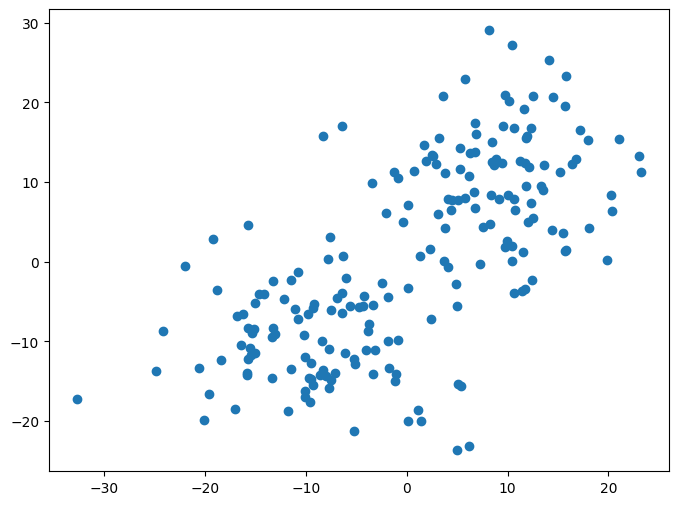

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
np.random.seed(42)
x1 = np.random.randn(100, 2) * 7 + 10 
x2 = np.random.randn(100, 2) * 7 - 10 
x = np.row_stack([x1, x2])
plt.scatter(x[:, 0], x[:, 1])
plt.show()

- A simulated data set with 200 observation in 2-dimensional space.

In [3]:
from sklearn.cluster import KMeans

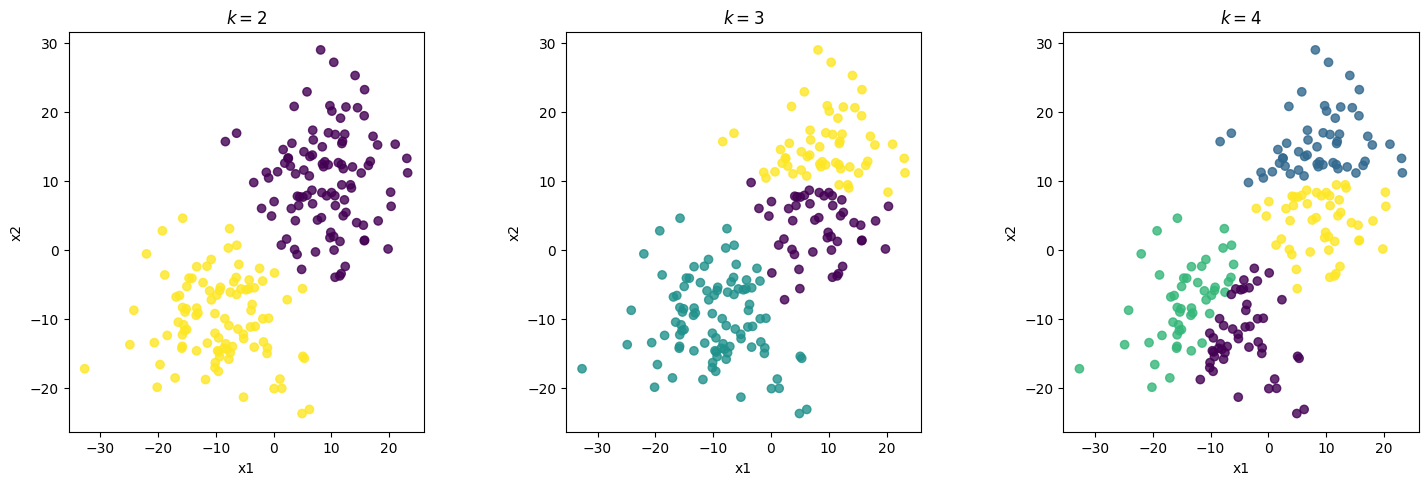

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
for i,ax in zip(range(2,5),[ax1, ax2, ax3]):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    ax.scatter(x[:, 0], x[:, 1],c=kmeans.labels_, alpha=0.8)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('$k=$'+str(i))
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

- The color labels the cluster to which it has been assigned. Note that the cluster coloring is arbitrary since there is no absolute ordering of the clusters. 

### 3.3.1.2. Mathematical Understanding of KMeans
- Now the main question: what technique does k-means algorithm use to create these clusters? 
    - Suppose we use the **Euclidean** distance 
    $$D(\vec{q},\vec{p})=\sqrt{\sum_{i=1}^N(q_i-p_i)^2}.$$ 
    - Then the **within-cluster variation** $W(C_k)$ is defined as: 
    
    \begin{equation*}
        W(C_k)=\frac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p (x_{ij}-x_{i'j})^2 \label{eq:withinclustervar} \tag{3-1}
    \end{equation*}
    where 
        - $C_k$ is the total number of observations in cluster $k$
        - $i,i'\in C_k$ are indices of observations in cluster $C_k$
        - $p$ is the number of variables/features in dataset.
- Since the within-cluster variation is a quantitative gauge of the amount by which the observations in a specific cluster differ from one another, we want to ***minimize*** the sum of this quantity $W(C_k)$ in Eq. $\eqref{eq:withinclustervar}$ over all clusters: 
    \begin{equation*}
        \min_{C_1,\dots,C_k}\Big\{\sum_{i=1}^k W(C_i)\Big\}
        \label{eq:minWc} \tag{3-2}
    \end{equation*}
- In Eq. $\eqref{eq:minWc}$, we would like to partition the observations into $K$ clusters such that the total within-cluster variation aggregated across all $K$ clusters is as small as possible; the optimization problem for K-means is as follows:
    \begin{equation*}
        \min_{C_1,\dots,C_k}\Big\{\sum_{i=1}^k \frac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p (x_{ij}-x_{i'j})^2\Big\}
        \label{eq:totalWC}\tag{3-3}
    \end{equation*}
- Finding the global minimum of Eq. $\eqref{eq:totalWC}$ is very difficult.
- In practice, most K-means packages perform the following greedy algorithm, also known as Lloyd algorithm in the computer science circle.

### 3.3.1.3. KMeans Algorithm

    
1. Randomly assign  an integer label, from 1 to K (where K is the number of clusters), to each of the observations. These serve as initial cluster assignments for the observations. 
2. Iterate until the cluster assignments stop changing:
    1. For each of the K clusters, compute the cluster’s new centroid. 
    2. Assign each observation to the cluster whose centroid is closest (closest is measured using Euclidean distance). 

In [5]:
np.random.seed(123)
x3 = np.random.randint(2, size=len(x))
x=pd.DataFrame(np.column_stack([x,x3]))
x.columns=['x','y','cluster']

In [6]:
len(x[x['cluster']==0])

102

In [7]:
print(f'{x.shape}')

(200, 3)


In [8]:
x0=x[x['cluster']==0]
x1=x[x['cluster']==1]
print(f'the number of cluster id 0 is {len(x0)}')
print(f'the number of cluster id 0 is {len(x1)}')

the number of cluster id 0 is 102
the number of cluster id 0 is 98


In [9]:
x0_cx, x0_cy = x0['x'].mean(), x0['y'].mean()
x1_cx, x1_cy = x1['x'].mean(), x1['y'].mean()
print(f'the center of cluster=0 is {round(x0_cx,2),round(x0_cy,2)}')
print(f'the center of cluster=1 is {round(x1_cx,2),round(x1_cy,2)}')

the center of cluster=0 is (1.08, 0.63)
the center of cluster=1 is (-1.03, -0.1)


In [10]:
cluster0, cluster1 = 0, 0
cx0, cy0 = [], []
cx1, cy1 = [], []
for index,row in x0.iterrows():
    distance0 = np.sqrt((row['x']-x0_cx)**2+(row['y']-x0_cy)**2)
    distance1 = np.sqrt((row['x']-x1_cx)**2+(row['y']-x1_cy)**2)
    if distance0<=distance1:
        cluster0 = cluster0+1
        cx0.append(row['x'])
        cy0.append(row['y'])
    else:
        cluster1 = cluster1+1
        cx1.append(row['x'])
        cy1.append(row['y'])
print(f'the new cluster=0 number is {cluster0}.')
print(f'the new cluster=0 center is {round(np.mean(cx0),2),round(np.mean(cy0),2)}.')
print(f'the new cluster=1 number is {cluster1}.')
print(f'the new cluster=0 center is {round(np.mean(cx1),2),round(np.mean(cy1),2)}.')

the new cluster=0 number is 54.
the new cluster=0 center is (10.18, 10.0).
the new cluster=1 number is 48.
the new cluster=0 center is (-9.17, -9.91).


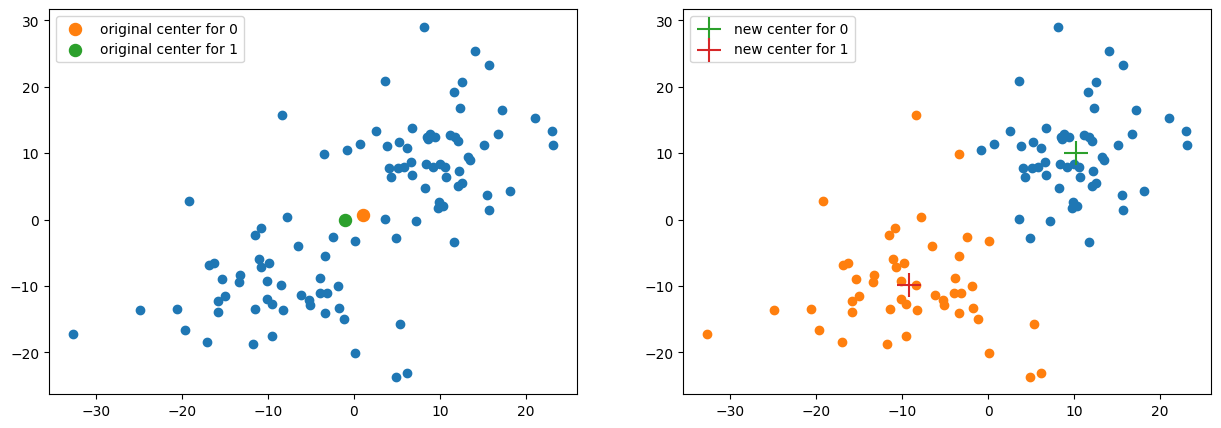

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(x0['x'],x0['y'])
ax1.scatter(x0_cx, x0_cy,marker='.',s=300,label='original center for 0')
ax1.scatter(x1_cx, x1_cy,marker='.',s=300,label='original center for 1')
ax1.legend()

ax2.scatter(cx0,cy0)
ax2.scatter(cx1,cy1)
ax2.scatter(np.mean(cx0), np.mean(cy0),marker='+',s=300,label='new center for 0')
ax2.scatter(np.mean(cx1), np.mean(cy1),marker='+',s=300,label='new center for 1')
ax2.legend()
plt.show()

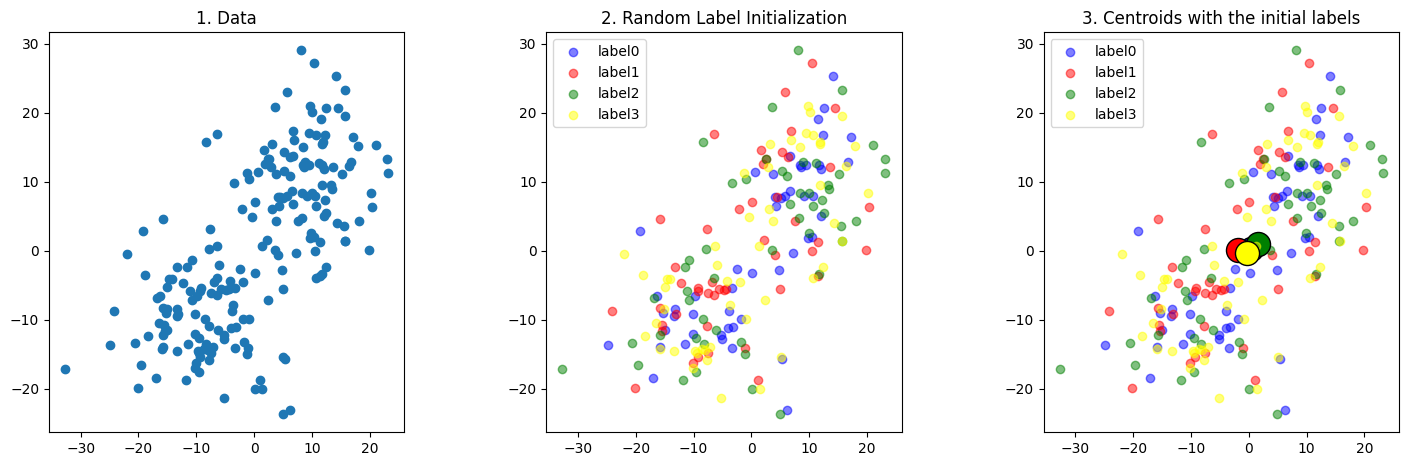

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
np.random.seed(42)
x1 = np.random.randn(100, 2) * 7 + 10 
x2 = np.random.randn(100, 2) * 7 - 10 
x=np.row_stack([x1,x2])
x=pd.DataFrame(x)
x.columns=['x','y']
ax1.scatter(x['x'], x['y'])
ax1.set_title('1. Data')

np.random.seed(123)
L=4
x3 = np.random.randint(L, size=len(x))
x=pd.DataFrame(np.column_stack([x,x3]))
x.columns = ['x','y','label']



x_mean=x.groupby('label').mean()
x_mean.reset_index(inplace=True)

for l,color in zip(range(0,L),['blue','red','green','yellow']):
    ax2.scatter(x['x'][x['label']==l], x['y'][x['label']==l],alpha=0.5,color=color,label='label'+str(l))
    ax2.legend()
    ax2.set_title('2. Random Label Initialization')
    ax3.scatter(x['x'][x['label']==l], x['y'][x['label']==l],alpha=0.5,color=color,label='label'+str(l))
    ax3.scatter(x['x'][x['label']==l].mean(),x['y'][x['label']==l].mean(), marker="o", 
                s=300,alpha=1,color=color,edgecolor='black')
    ax3.legend()
ax3.set_title('3. Centroids with the initial labels')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

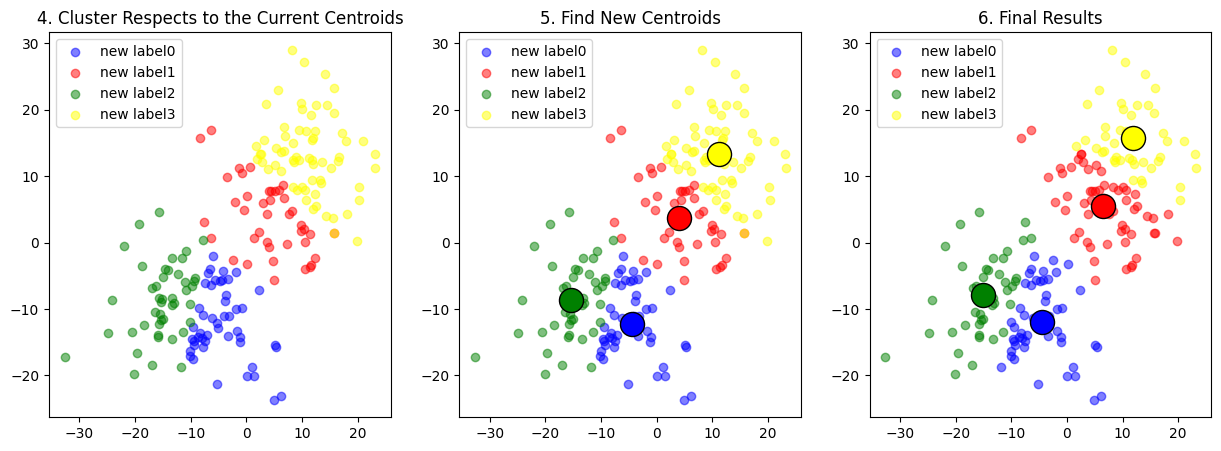

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
kmeans = KMeans(n_clusters=L,random_state=0,n_init=1,max_iter=1)
kmeans.fit(x[['x','y']])
x['newlabel']=kmeans.labels_
x['newlabel'].replace({3:1,0:2,2:0,1:3},inplace=True)
for l,color in zip(range(0,L),['blue','red','green','yellow']):
    ax1.scatter(x['x'][x['newlabel']==l], x['y'][x['newlabel']==l],alpha=0.5,color=color,label='new label'+str(l))
    ax1.legend()
    ax1.set_title('4. Cluster Respects to the Current Centroids')

    ax2.scatter(x['x'][x['newlabel']==l], x['y'][x['newlabel']==l],alpha=0.5,color=color,label='new label'+str(l))
    ax2.scatter(x['x'][x['newlabel']==l].mean(),x['y'][x['newlabel']==l].mean(), marker="o", 
            s=300, color=color,alpha=1,edgecolors='black')
    ax2.set_title('5. Find New Centroids')
    ax2.legend()

kmeans = KMeans(n_clusters=L,random_state=0,n_init=1,max_iter=10)
kmeans.fit(x[['x','y']])
x['newlabel']=kmeans.labels_
x['newlabel'].replace({3:1,0:2,2:0,1:3},inplace=True)

for l,color in zip(range(0,L),['blue','red','green','yellow']):
    ax3.scatter(x['x'][x['newlabel']==l], x['y'][x['newlabel']==l],alpha=0.5,color=color,label='new label'+str(l))
    ax3.scatter(x['x'][x['newlabel']==l].mean(),x['y'][x['newlabel']==l].mean(), marker="o", 
            s=300, color=color,alpha=1,edgecolors='black')
    ax3.set_title('6. Final Results')
    ax3.legend()

plt.show()

### 3.3.1.4. KMeans Optimization

- The KMeans procedure always converges:
    1. If you run the algorithm from a fixed initial assignment, it will reach a stable endpoint where the clustering solution will no longer change through the iterations. 
    2. Unfortunately, the guaranteed convergence is to a local minimum. 
        - Thus, if we begin the KMeans algorithm with a different initial configuration, it is possible that convergence will find different centroids and therefore ultimately assigning different cluster memberships. 
- What can we do to get around this?
    - Run the KMeans procedure several times and pick the clustering solution that yields the smallest aggregate within-cluster variance. 
- The Kmeans++ (2007) improves the random seeding of the original KMeans.
    1. The initialization step runs inductively.
    2. Firstly, pick a data point randomly as the first centroid.
    3. Suppose that k of the seed centroid have been chosen, compute for each data point x the distance $D(x)$ to the closest centroid among these k seed centroids. Select the $(k+1)^{th}$ centroid randomly, according to a probability distribution with probability proportional to $D(x)^2$.
    4. In each inductive step, the newly found seed centroid trends to keep a far distance from the existing ones.
    5. The algorithm will stop when it has found the least/best (local optimum) value. 
- The default initialization scheme of Scikit-Learn’s KMeans uses KMeans++. 

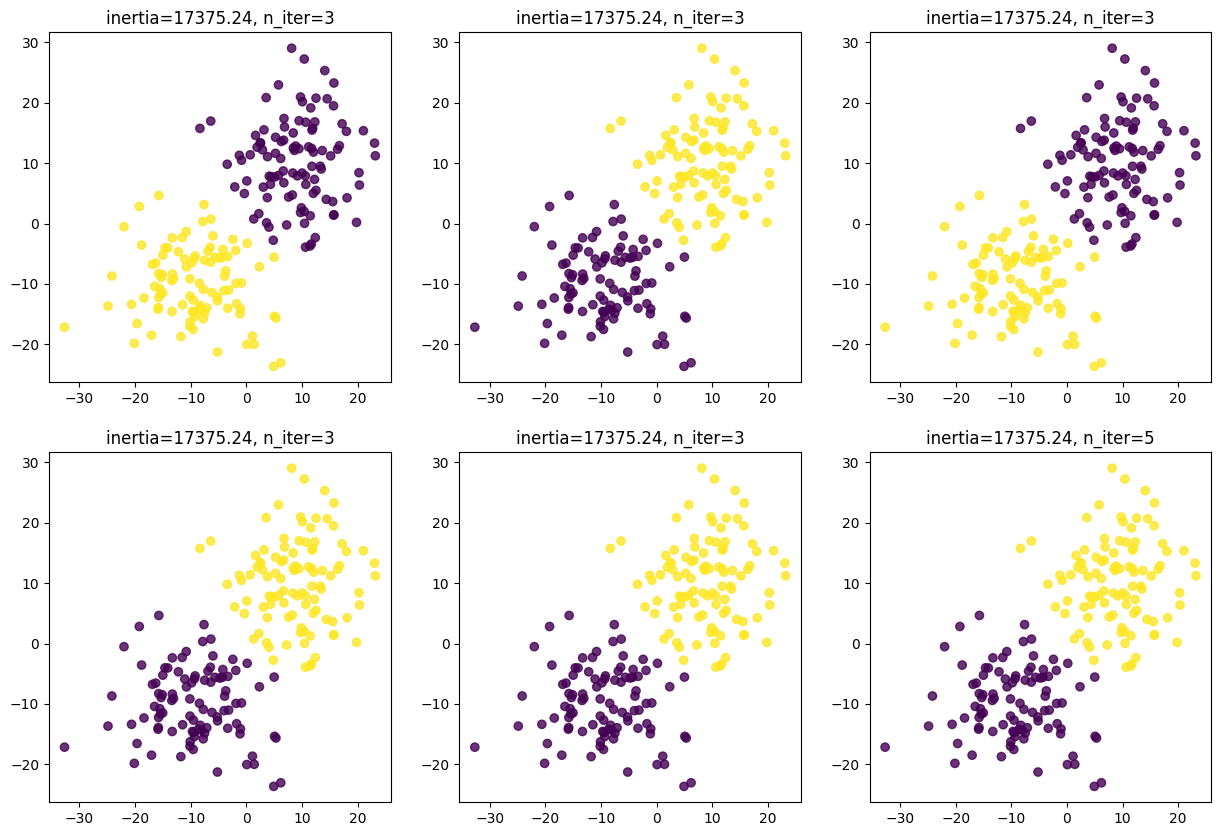

In [14]:
x=np.row_stack([x1,x2])
ax1.scatter(x[:,0], x[:,1])
ax1.set_title('1. Data')

np.random.seed(123)
L=2
x3 = np.random.randint(L, size=len(x))
x=pd.DataFrame(np.column_stack([x,x3]))
x.columns = ['x','y','label']

fig, axs = plt.subplots(2, 3, figsize=(15,10))
max_iter = 10
n_init=1
for i in range(0,2):
    for j in range(0,3):
        n_init=np.random.randint(n_init,5)
        max_iter = np.random.randint(max_iter,100)
        kmeans = KMeans(n_clusters=2,n_init=n_init,max_iter=max_iter)
        kmeans.fit(x[['x','y']])
        axs[i,j].scatter(x['x'],x['y'],c=kmeans.labels_,alpha=0.8)
        axs[i,j].set_title('inertia='+str(round(kmeans.inertia_,2))+', n_iter='+str(kmeans.n_iter_))
plt.show()

### 3.3.1.5. $K$-value Determination

In [15]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

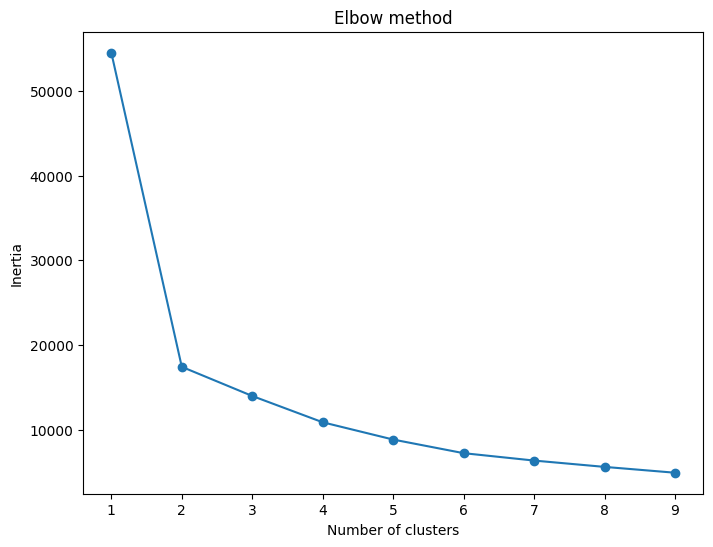

In [16]:
plot_inertia(KMeans(), x, range(1,10))

### 3.3.1.6. `sklearn` KMeans

In [17]:
from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()

**Arguments**:
- n_clusters: The number of clusters to divide, default is 8.
- max_iter: The maximal number of iterations, default is 300.
- n_init: Number of time the k-means algorithm will run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. default is 10.
- init: Method for initialization, defaults to 'k-means++'. Other options are 'random' or an ndarray of shape (n_clusters, n_features) and gives the initial centers.
- random_state: Optional. The generator used to initialize the centers. If an integer is given, it fixes the seed. Defaults to the global numpy random number generator.
Usually, we just need to set the argument n_clusters to determine how many groups are we going to split.

**Attributes**:
- cluster_centers_: The coordinates of cluster centers.
- labels_: Labels of each observation, which indicate the group number of each observation.
- inertia_: Sum of distances of samples to their closest cluster center.

The most import attribute here is the labels_ .

**Methods**:
- fit: Fit k-means clustering on a given data set.
- fit_predict: Compute cluster centers and predict cluster index for each sample.
- get_params: Get parameters for this estimator.
- set_params: Set the parameters of this estimator.
- predict: Given a set of data, predict the closest cluster each sample belongs to.

### 3.3.1.7. `sklearn` Example

In this case, we try to split the iris data into multiple groups by using the features sepal length, sepal width, petal length, petal width.
- Set the argument n_clusters to 3.
- Fit the iris data.

In [18]:
from sklearn import datasets
iris = datasets.load_iris()

In [19]:
kmeans = KMeans()

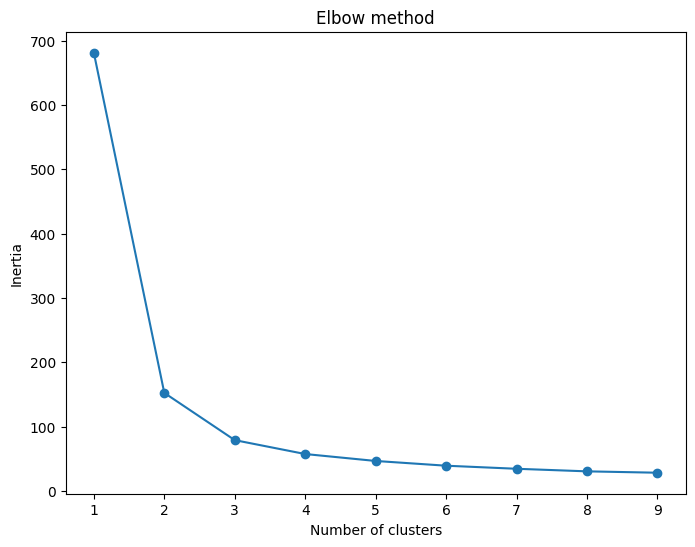

In [20]:
plot_inertia(kmeans, iris.data, range(1, 10))

In [21]:
kmeans.set_params(n_clusters=3)
kmeans.fit(iris.data)

KMeans(n_clusters=3)

- The label of each observation.

In [22]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

- The centroid of each cluster:

In [23]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

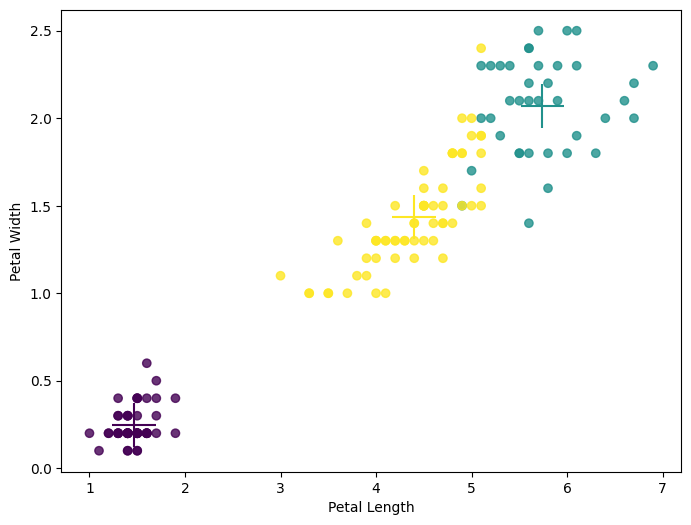

In [24]:
import  matplotlib.pyplot as plt
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

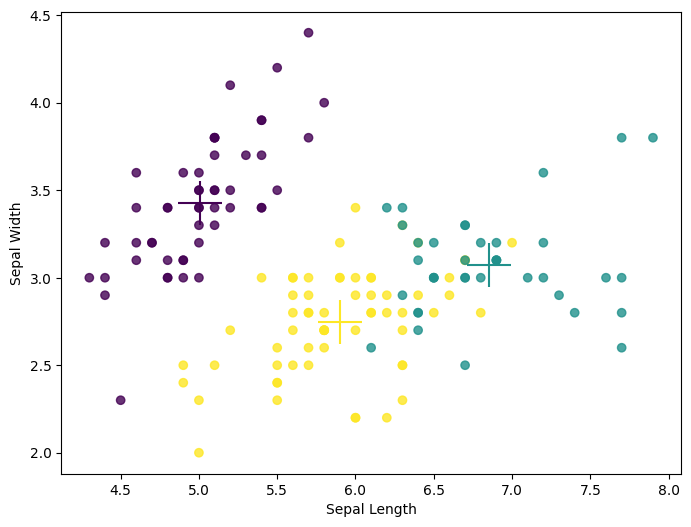

In [25]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

- The big markers "+" refers to the centroid of each cluster.
- We can also fit the principal components to the KMeans algorithm. Perform K means on the new dataset below, and then find the centers and the labels.

In [26]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

def plot_silhouette(km, x):
    y_km = kmeans.fit_predict(x)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster c, and sort them
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()

        size_cluster_c = len(c_silhouette_vals)
        y_ax_upper += size_cluster_c
        color = cm.jet(i*1.0/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, color=color)

        # Compute the new y_ax_lower for next plot
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += size_cluster_c

    # The vertical line for average silhouette score of all the values
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')

    plt.yticks(yticks, cluster_labels + 1)
    plt.title('Silhouette Analysis')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

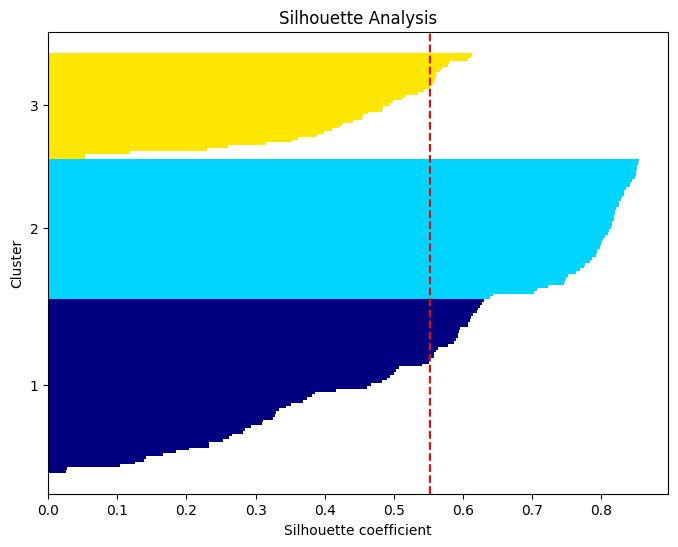

In [27]:
kmeans.set_params(n_clusters=3)
plot_silhouette(kmeans, iris.data)

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

### 3.3.1.8 Summary of K-means
K-means clustering algorithms require:
1. the choice of the number of classes to be clustered, 
2. a starting cluster configuration assignment. 
3. In most cases, this is hard to determine. 

#### Strengths
- Use simple principles for identifying clusters which can be explained in non-statistical terms.
- It is fairly efficient and performs well at dividing the data into useful clusters.

#### Weaknesses
- It is less sophisticated than more recent clustering algorithms.
- Because it uses initial random choice, it is not guaranteed to find the optimal set of clusters.
- Require a reasonable guess for how many clusters naturally exist in the data.


## 3.3.2. Hierarchical Clustering (Agglomerative Clustering)

**Hierarchical clustering** method is another popular clustering method which seeks to build a hierarchy of clusters. 
- It does not require the user to specify the number of clusters. Instead, it requires to measure the dissimilarity between the pairs of clusters. 
- The clusters at a higher level are created by merging clusters at the lower level:
    - At the lowest level, each cluster contains a single observations.
    - At the highest level, all of the data points from a single cluster. 

### 3.3.2.1. Algorithm
- Two strategies for hierarchical clustering: bottom-up and top-down. 
- The approach can be summarized as:
    1. Start with each point in its own cluster.
    2. Identify the two clusters which are most similar and merge them.
    3. Repeat step 2.
    4. Ends when all data points are in a single cluster. 

In the lecture we show how to build a hierarchy in a bottom-up fashion.
<img src="img/hierarchical_01.png" width=600 length=700 />
- There are some interpretative advantages to visualizing the dendrogram created from hierarchical clustering:
    - The lower down in the dendrogram a cluster fusion occurs, the more similar the fused clusters are to each other.
    - The higher up in the dendrogram a fusion occurs, the more dissimilar the fused groups are to each other.
- In general, for any two observations we can inspect the dendrogram and find the location at which the groups that contain those two observations are fused together to get an idea of their dissimilarity.
    - Be careful to consider the groups of points in the fusions within the dendrograms, not just individual points.
<img src="img/hierarchical_02.png" width=600 length=800 />
- Begin with n observations and a distance measure of all pairwise dissimilarities. At this step, treat each of the n observations as their own clusters.
    - For $i=n,n-1,\dots,2$:
        1. Evaluate all pairwise inter-cluster dissimilarities among the i clusters and fuse together the pair of clusters that are the least dissimilar.
        2. Note the dissimilarity between the recently fused cluster pair and mark that as the associated height in the dendrogram.
        3. Repeat the process in step 1, calculating the new pairwise inter-cluster dissimilarities among the remaining $(i - 1)$ clusters.
        
### 3.3.2.2. Measurements
- While we do not need to specify K a priori, in order to perform hierarchical clustering there are a few choices we need to make. Particularly:
    - A dissimilarity measure.
    - A linkage method.
- We are already familiar with the idea of choosing a dissimilarity measure with the choice of distance metric. In many cases, it is sufficient to use the Euclidean distance.
- A **linkage** is a measure of the dissimilarity between two group of points. So far we only define the distance between two points, but what do we do when we want to assess the similarity among two groups of points?
- The most common types of linkage are described below.
     - First, compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B. Then:
      1. Complete Linkage: Maximal inter-cluster dissimilarity.
            - Record the largest of the dissimilarities listed between members of A and of B as the overall inter-cluster dissimilarity.
            - sensitive to outliers, yet it tends to identify clusters that are compact, somewhat spherical objects with relatively similar diameters.
      2. Single Linkage: Minimal inter-cluster dissimilarity.
             - Record the smallest of the dissimilarities listed between members of A and of B as the overall inter-cluster dissimilarity.
             - not as sensitive to outliers, yet tends to identify clusters that have a chaining effect; these clusters often fail to represent intuitive groupings among our data, and the observations in the same cluster might be quite distant from one another.
      3. Average Linkage: Mean inter-cluster dissimilarity.
            - Record the average of the dissimilarities listed between the members of A and of B as the overall inter-cluster dissimilarity.
            - tends to strike a balance between the pros and cons of complete linkage and single linkage.

       4. Ward’s Linkage: Minimum variance method (for Euclidean distance).
            - Minimize the variance of the clusters being merged.
            
<img src="img/linkage.png" width=800 length=800 />



### 3.3.2.3. `sklearn` AgglomerativeClustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

**Arguments**:
- n_clusters: The number of clusters to find. default=2
- affinity: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”. If linkage is “ward”, only “euclidean” is accepted. default: “euclidean”
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - ward minimizes the variance of the clusters being merged.
    - average uses the average of the distances of each observation of the two sets.
    - complete or maximum linkage uses the maximum distances between all observations of the two sets.

**Arguments**:
- The possible values of the affinity are “euclidean”, “l1”, “l2”, “manhattan”, “cosine”.
- "l1" is the same as "manhattan", while "l2" is the same as "euclidean".
- "cosine" here in python is not the same as we told previously.
The smaller the euclidean/manhattan distance is, the closer the two observations are. The smaller the cosine is, the more far the observations are.
So in Python, the cosine distance is redefined as :
\begin{equation*}
1-\frac{\sum_{i=1}^n x_{1i}\times x_{2i}}{\sqrt{||x_1||^2}\times\sqrt{||x_2||^2}}
\tag{3-4}
\end{equation*}

The cosine distance ranges from 0 to 2, and the smaller it is, the closer the observations are.
- 0: two vectors point to the same direction
- 1: perpendicular
- 2: opposite direction

#### Distance in Scikit Learn
We can compute the different distances by using the function pairwise_distances.

In [29]:
import numpy as np
a = np.array([[1, 2], [2, 1]])

##### Euclidean Distance

In [30]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(a, metric='l2') 

array([[0.        , 1.41421356],
       [1.41421356, 0.        ]])

In [31]:
((1-2)**2 + (2-1) ** 2) ** 0.5

1.4142135623730951

##### Cosine Distance

In [32]:
pairwise_distances(a, metric='cosine') 

array([[0. , 0.2],
       [0.2, 0. ]])

In [33]:
1 - (1*2 + 2*1)/(5**0.5 * 5**0.5)

0.20000000000000018

**Attributes**:
- labels_: Cluster labels for each observation.
- n_leaves_: Number of leaves in the hierarchical tree, which is also the number of observations.
**Methods**:
- fit: Fit the hierarchical clustering on the data.
- get_params: Get parameters for this estimator.
- set_params: Set the parameters of this estimator.

### 3.3.2.4. `sklearn` Example

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
hier.set_params(n_clusters=3)
hier.fit(iris.data)

AgglomerativeClustering(n_clusters=3)

In [35]:
hier.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

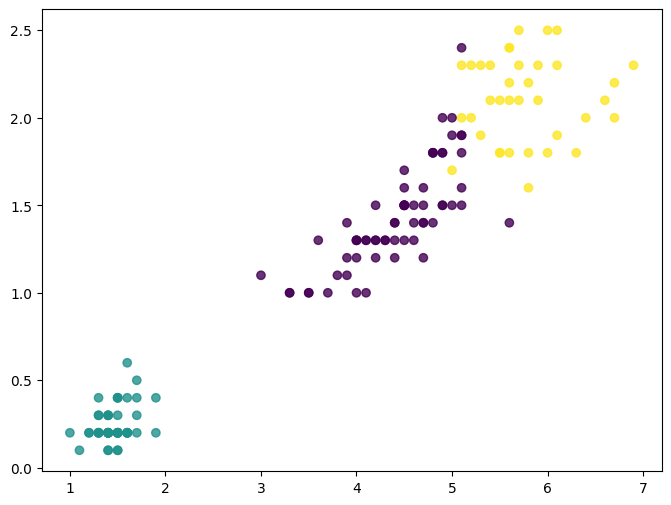

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=hier.labels_, alpha=0.8)
plt.show()

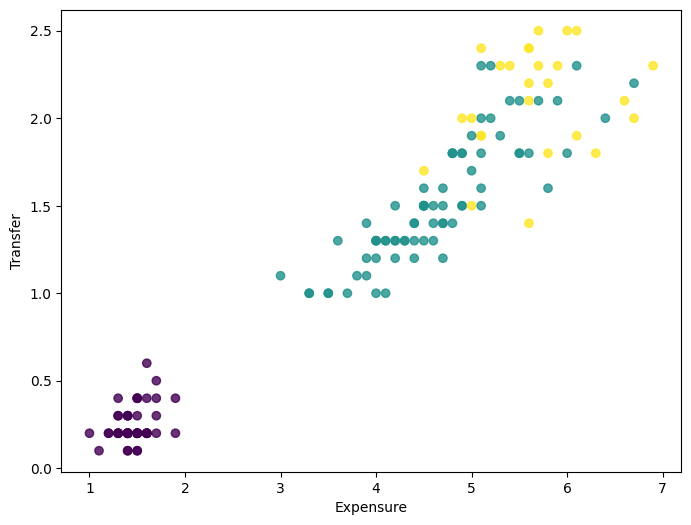

In [37]:
hier.set_params(n_clusters=3, affinity='cosine', linkage='complete')
hier.fit(iris.data)
label = hier.labels_
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=label, alpha=0.8)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

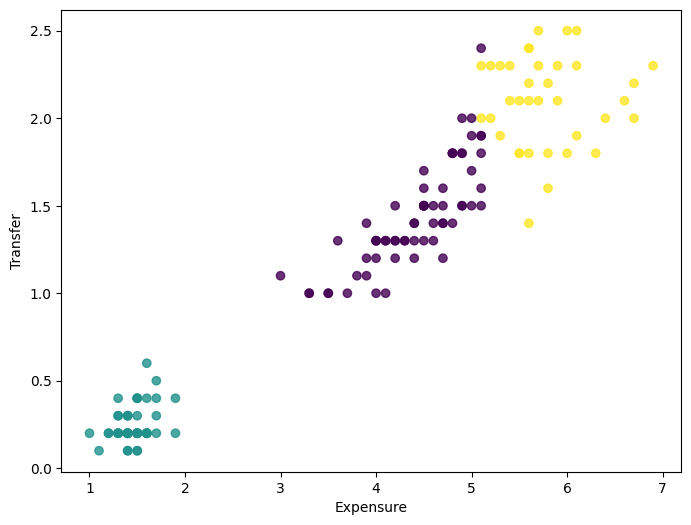

In [38]:
hier.set_params(n_clusters=3, affinity='euclidean', linkage='average')
hier.fit(iris.data)
label = hier.labels_
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=label, alpha=0.8)
plt.xlabel('Expensure')
plt.ylabel('Transfer')
plt.show()

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import pandas as pd
def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [40]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
linkage_df = linkage_frame(iris_df.values)
linkage_df.head()

,row label 1,row label 2,distance,no. items in clust.
cluster 1,101.0,142.0,0.0,2.0
cluster 2,7.0,39.0,0.1,2.0
cluster 3,0.0,17.0,0.1,2.0
cluster 4,9.0,34.0,0.1,2.0
cluster 5,128.0,132.0,0.1,2.0


In [42]:
dendrogram?

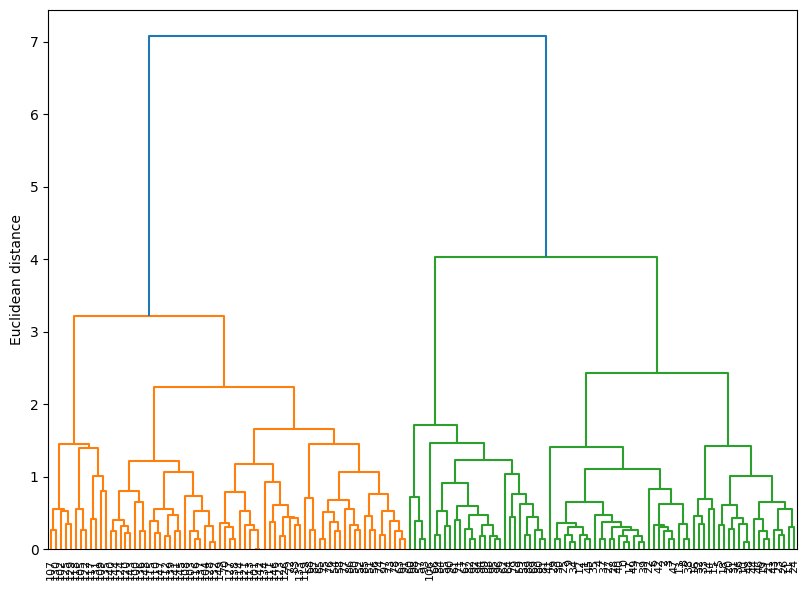

In [43]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

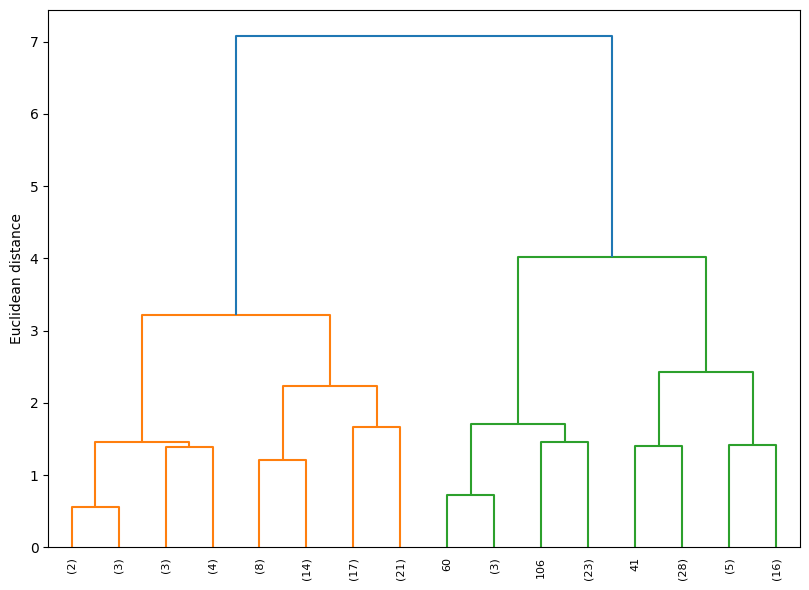

In [44]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='level', p = 3, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## 3.3.3. Gaussian Mixture (GM)

### 3.3.3.1. GM Description

A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by $k\in{1,\dots, K}$, where $K$ is the number of clusters of our dataset. Each Gaussian $k$ in the mixture is comprised of the following parameters:

- A mean $\mu$ that defines its center.
- A covariance $\Sigma$ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
- A mixing probability $\pi$ that defines how big or small the Gaussian function will be.

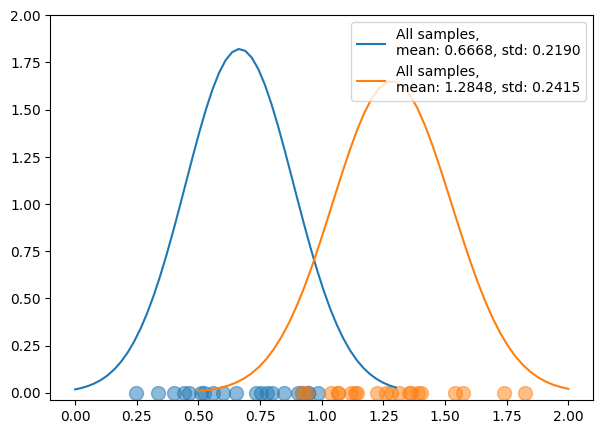

In [45]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


N = int(20)
np.random.seed(168)

X = np.array(sorted(np.random.rand(N)))
Y = np.array(sorted(np.random.rand(N)))+0.9

plt.figure(figsize=(7, 5))
plt.ylim(-0.04, 2)

my_normX = stats.norm(np.mean(X), np.std(X)).pdf
labelX = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(X), np.std(X))
plt.plot(np.linspace(0, 1.3), my_normX(np.linspace(0, 1.3)), label=labelX)
my_normY = stats.norm(np.mean(Y), np.std(Y)).pdf
labelY = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(Y), np.std(Y))
plt.plot(np.linspace(0.5, 2.0), my_normY(np.linspace(0.5, 2.0)), label=labelY)
plt.scatter(X,[0]*N,alpha=0.5,s=100)
plt.scatter(Y,[0]*N,alpha=0.5,s=100)
plt.legend(loc='upper right')
plt.show()

* The mixing coefficients are themselves probabilities and must meet this condition:

$$\sum_{k=1}^K \pi_k = 1\,\,\,\,{\rm and}\,\,\,\,\pi_k\ge0\, \forall k$$

* The general Gaussian distribution for multi-variable is expressed below:
\begin{equation*}
\mathcal{N}({\bf x}|\mu,\Sigma)=\frac{1}{2^{D/2}|\Sigma|^{1/2}}\exp{\Big(-\frac{1}{2}({\bf x}-\mu)^T\Sigma^{-1}({\bf x}-\mu)\Big)}
\label{eq:GD}\tag{3-5}\\
\end{equation*}
\begin{equation*}
\ln{\mathcal{N}({\bf x}|\mu,\Sigma)}=-\frac{D}{2}\ln 2\pi -\frac{1}{2}\ln\Sigma-\frac{1}{2}({\bf x}-\mu)^T\Sigma^{-1}({\bf x}-\mu)
\label{eq:logGD}\tag{3-6}
\end{equation*}
where $\eqref{eq:logGD}$ is the log of $\eqref{eq:GD}$ and it is much easier to handle analytically and computationally. In both $\eqref{eq:GD}$ and $\eqref{eq:logGD}$, $D$ is the number of dimentions, $\mu$ is the mean, and $\Sigma$ is the covariance. 

    * In this example, $D=2$ and $N=20$. Therefore ${\bf x}$ will be a $20\times 2$ matrix, $\mu$ a $1\times 2$ vector, and $\Sigma$ a $2\times 2$ matrix. 

### 3.3.3.2. Mathematics

1. Gaussian mixture model (GMM) is a density estimator and represents a distribution as 
\begin{equation*}
p({\bf x})=\sum_{k=1}^K \pi_k \mathcal{N}({\bf x}|\mu_k,\Sigma_k)
\label{eq:gmm}\tag{3-7}
\end{equation*}

2. We can find parameters $\Theta = \{\pi_k,\mu_k,\Sigma_k\}$ using log maximum likelihood estimation by taking a derivative of $p({\bf x})$ with respect to $\Theta$,
\begin{equation*}
\ln{p({\bf x|\pi,\mu,\Sigma})}=\sum_{n=1}^N\ln{\Big(\sum_{k=1}^K \pi_k \mathcal{N}({\bf x}|\mu_k,\Sigma_k)\Big)}
\end{equation*}
- Arbitrarily large likelihood when a Gaussian explains a single point.
- Solution is up to permutations. 
- The finding the optimized $\Theta$ is not easy. 

3. To overcome, let $z\in\{0,1\}$ be a ***latent variable*** that explains the Gaussian generated observation of ${\bf x}$ with some probability,
$$p(z_{k}=1|{\bf x}_k)=\pi_k$$
and the set of all possible latent variables $z$ is 
$${\bf z}=\{z_1,\dots,z_K\}\,{\rm and}\,p({\bf z})=\prod_{k=1}^K \pi_k^{z_k}.$$

4. The conditional probability of ${\bf x}$ at given ${\bf z}$ is 
\begin{equation*}
p({\bf x}|{\bf z})=\prod_{k=1}^K \mathcal{N}({\bf x}|\mu_k,\Sigma_k)^{z_k}.
\end{equation*}
From the product rule, the joint distribution becomes $p({\bf x}_n)=p({\bf z})p({\bf x}_n|{\bf z})$,
\begin{equation*}
p({\bf x})=\sum_{k=1}^K \pi_k \mathcal{N}({\bf x} | \mu_k , \Sigma_k)
\end{equation*}
and for all observations of ${\bf x}$, 
\begin{equation*}
p({\bf X})=\prod_{n=1}^N \pi_k \sum_{k=1}^K \mathcal{N} ({\bf x} | \mu_k, \Sigma_k )
\label{eq:mle}\tag{3-8}
\end{equation*}


5. The log-likelihood of $\eqref{eq:mle}$, $\mathcal{L}(\pi,\mu,\Sigma)$ becomes
\begin{equation*}
\mathcal{L}=\ln{p({\bf X})} = \sum_{n=1}^N \ln \sum_{k=1}^K \pi_k \mathcal{N}({\bf x}_n|\mu_k,\Sigma_k)\\
= \sum_{n=1}^N \ln{\sum_{z^{(n)}=1}^K p({\bf x}_n|{\bf z}^{(n)}, \mu_{z^{(n)}=1},\Sigma_{z^{(n)}=1})p({\bf z}_n|\pi)}\\
= \sum_{n=1}^N \ln{p({\bf x}_n|{\bf z}^{(n)}; \mu_{z^{(n)}=1},\Sigma_{z^{(n)}=1})} + \ln{p({\bf z}^{(n)}|\pi)}
\label{eq:logLME}\tag{3-9}
\end{equation*}
where the latent variable $z^{(n)}$ is for every observation. 

6. Maximum Likelihood Estimator: by taking a derivative of Eq. $\eqref{eq:logLME}$ w.r.t. $\mu_k$ and $\Sigma_k$ and set equals to 0, $\mu_k$ and $\Sigma_k$ can be obtained as follow,

\begin{equation*}
\mu_k = \frac{\sum_{n=1}^N1_{[z^{(n)}=1]}{\bf x}^{(n)}}{\sum_{n=1}^N 1_{[z^{(n)}=k]}}
\end{equation*}

\begin{equation*}
\Sigma_k = \frac{\sum_{n=1}^N1_{[z^{(n)}=1]}({\bf x}_n-\mu_k)({\bf x}_n-\mu_k)^T}{\sum_{n=1}^N 1_{[z^{(n)}=k]}}.
\end{equation*}

7. Using the solutions, $\pi_k$ is $\frac{1}{N}\sum_{n=1}^N 1_{[z^{(n)}=k]}$


### 3.3.3.3. Expectation Maximization algorithm

* The GMM uses the **Expectation Maximization algorithm** which alternates between two steps. 
    * **E-step**: Compute the posterior probability that each Gaussian generates each datapoint as it is unknown. 
         * Solve the inference problem: Which Gaussian generated which point? 
         * Consider the all possibilities,
         \begin{equation*}
         \gamma_{nk}=p({\bf z}_{n}=k|{\bf x}_n;\pi,\mu,\Sigma)
         \label{eq:gamma}\tag{3-10}
         \end{equation*}
         that is a conditional probability of ${\bf z}$ at given ${\bf x}$.
         * Eq. $\eqref{eq:gamma}$ can be found using Bayes' theorem as following,
         \begin{equation*}
         \gamma(z_k)=p(z_k=1|{\bf x})=\frac{p(z_k=1)p({\bf x}|z_k=1)}{\sum_{j=1}^Kp(z_j=1)p({\bf x}|z_j=1)}
         =\frac{\pi_k\mathcal{N}({\bf x}|\mu_k,\Sigma_k)}{\sum_{j=1}^K\pi_j\mathcal{N}({\bf x}|\mu_j,\Sigma_j)}
         \end{equation*}
    * **M-step**: Change the parameters of each Gaussian to maximize the probability that it would generate that data it is currently responsible for. 
        * Each Gaussian gets a certain amount of posterior probability for each datapoint. 
        * The optimum is
        \begin{equation*}
        \frac{\partial\ln{p({\bf X}|\pi,\mu,\Sigma)}}{\partial\Theta}=0.
        \end{equation*}
        * For $\mu_k$, 
        \begin{equation*}
        \frac{\partial\ln{p({\bf X}|\pi,\mu,\Sigma)}}{\partial\mu_k}=\frac{\partial}{\partial\mu_k}
        \Big(\sum_{n=1}^N \ln\Big(\sum_{k=1}^K \pi_k \mathcal{N}({\bf x}_n|\mu_k,\Sigma_k)\Big)\Big) = 0\\
         = \sum_{n=1}^N\frac{\pi_k\mathcal{N}({\bf x}_n|\mu_k,\Sigma_k)}{\sum_{j=1}^K\pi_j\mathcal{N}({\bf x}|\mu_j,\Sigma_j)}\Sigma_k({\bf x}_n-\mu_k)
        \label{eq:mle_muk}\tag{3-11}
        \end{equation*}
        
            * Using the definition of matrix calculus
            $$\frac{\partial({\bf x^TAx})}{\partial\bf x}={\bf x}^T({\bf A}+{\bf A}^T),$$
            Eq. $\eqref{eq:mle_muk}$ can be expressed using Eq. $\eqref{eq:gamma}$
            \begin{equation*}
            0 = \sum_{n=1}^N\gamma_{nk}\Sigma_k({\bf x}_n-\mu_k)
            \end{equation*}
            and $\mu_k$ becomes
            \begin{equation*}
            \mu_k = \frac{1}{N_k}\sum_{n=1}^N\gamma_{nk}{\bf x}_n
            \label{eq:mle_muk_1}\tag{3-12}
            \end{equation*}
            where $N_k$ is the effective number of points in cluster $k$ that is $N_k=\sum_{n=1}^N\gamma_{nk}$.
            
            * This is similar to KMeans except that the data is weighted by the posterior probability of the Gaussian. 
            * It guarantees to lie in the convex hull of the data and may have a big initial jump. 
        * Can do similar procedure for $\Sigma_k$ as done for $\mu_k$ from Eq. $\eqref{eq:mle_muk_1}$. Then it becomes
        \begin{equation*}
        \Sigma_k = \frac{1}{N_k}\sum_{n=1}^N\gamma_{nk}({\bf x}_n-\mu_k)({\bf x}_n-\mu_k)^T
        \label{eq:mle_cov}\tag{3-13}
        \end{equation*}
       * Then, $\pi_k$ will be optimzied as 
       \begin{equation*}
       \pi_k=\frac{N_k}{N},\,\,\,\,{\rm with}\,\,N_k=\sum_{n=1}^N\gamma_{nk}
       \label{eq:mle_pi}\tag{3-14}
       \end{equation*}
       
  * Note: 
      * The optimal mixing proportion to use is just the fraction of the data that Gaussian gets $\gamma_{nk}$ not in a closed form - $\gamma_{nk}$ can be complex. 
      * However, we can converge the optimization function and find the parameters iteratively. 
      
### 3.3.3.4. GMM Algorithm with EM

1. Initialize parameters: $\mu_k$, $\Sigma_k$, and $\pi_k$. 
2. Iterate until convergence:

    1. **E-step**: Evaluate $\gamma_{nk}$ from Eq. $\eqref{eq:gamma}$. 
    2. **M-step**: Re-estimate the parameters using the current $\gamma_{nk}$ from A. 
    3. Evalaute log-likelihood and check for convergence. 
    

### 3.3.3.6. `sklearn` Example

In [46]:
import imageio
import matplotlib.animation as ani
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
from PIL import Image
from sklearn import datasets
from sklearn.cluster import KMeans

In [47]:
iris = datasets.load_iris()
X = iris.data
X[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [48]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [49]:
x0 = np.array([[0.05, 1.413, 0.212], [0.85, -0.3, 1.11], [11.1, 0.4, 1.5], [0.27, 0.12, 1.44], [88, 12.33, 1.44]])
mu = np.mean(x0, axis=0)
cov = np.dot((x0 - mu).T, x0 - mu) / (x0.shape[0] - 1)

y = gaussian(x0, mu=mu, cov=cov)
y

array([[0.00159853],
       [0.00481869],
       [0.00276259],
       [0.0014309 ],
       [0.00143998]])

In [50]:
def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans(n_clusters).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'pi_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [51]:
def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
    
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)

In [52]:
def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [53]:
def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

In [54]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood

        print('Epoch: ', i + 1, 'Likelihood: ', likelihood)

    scores = np.log(gamma_nk)
    
    return clusters, likelihoods, scores, sample_likelihoods, history

In [55]:
n_clusters = 3
n_epochs = 50

clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(X, n_clusters, n_epochs)

Epoch:  1 Likelihood:  -727.7880991223876
Epoch:  2 Likelihood:  -229.3310206629976
Epoch:  3 Likelihood:  -199.7481287796376
Epoch:  4 Likelihood:  -195.73888520322578
Epoch:  5 Likelihood:  -192.3961010234295
Epoch:  6 Likelihood:  -189.99480255980583
Epoch:  7 Likelihood:  -188.36696982597587
Epoch:  8 Likelihood:  -187.1221844039347
Epoch:  9 Likelihood:  -185.9688827396132
Epoch:  10 Likelihood:  -184.9027408554704
Epoch:  11 Likelihood:  -183.9615964160235
Epoch:  12 Likelihood:  -183.1229996094662
Epoch:  13 Likelihood:  -182.42175149358593
Epoch:  14 Likelihood:  -181.85314289768118
Epoch:  15 Likelihood:  -181.27453302608757
Epoch:  16 Likelihood:  -180.6705940238215
Epoch:  17 Likelihood:  -180.34032123839054
Epoch:  18 Likelihood:  -180.2333234193402
Epoch:  19 Likelihood:  -180.20041209371254
Epoch:  20 Likelihood:  -180.19017245247892
Epoch:  21 Likelihood:  -180.1869625954723
Epoch:  22 Likelihood:  -180.18594920021096
Epoch:  23 Likelihood:  -180.18562756299494
Epoch:  2

In [56]:

def create_cluster_animation(X, history, scores):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    colorset = ['blue', 'red', 'black']
    images = []
    
    for j, clusters in enumerate(history):
      
        idx = 0
      
        if j % 3 != 0:
            continue
        
        plt.cla()
        
        for cluster in clusters:
            mu = cluster['mu_k']
            cov = cluster['cov_k']

            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            vx, vy = eigenvectors[:,0][0], eigenvectors[:,0][1]
            theta = np.arctan2(vy, vx)

            color = colors.to_rgba(colorset[idx])

            for cov_factor in range(1, 4):
                ell = Ellipse(xy=mu, width=np.sqrt(eigenvalues[0]) * cov_factor * 2, height=np.sqrt(eigenvalues[1]) * cov_factor * 2, angle=np.degrees(theta), linewidth=2)
                ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
                ax.add_artist(ell)

            ax.scatter(cluster['mu_k'][0], cluster['mu_k'][1], c=colorset[idx], s=1000, marker='+')
            idx += 1

        for i in range(X.shape[0]):
            ax.scatter(X[i, 0], X[i, 1], c=colorset[np.argmax(scores[i])], marker='o')
        
        fig.canvas.draw()
        
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        images.append(image)
    
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./gmm.gif', images, fps=1)
    plt.show(Image.open('gmm.gif').convert('RGB'))

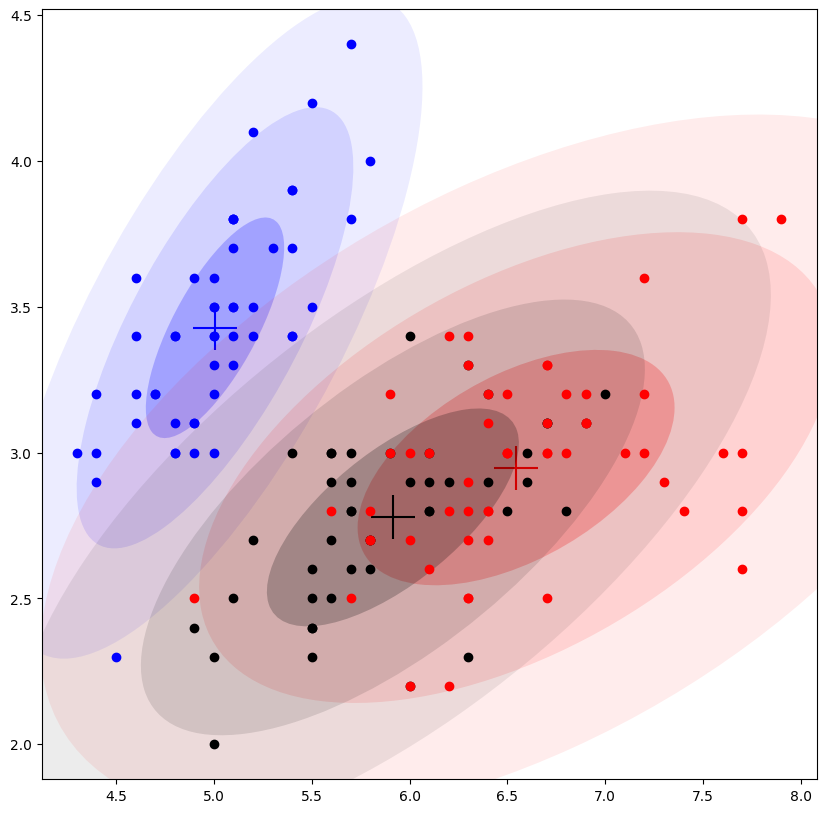

In [57]:
create_cluster_animation(X, history, scores)

In [58]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_clusters, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
Means by our implementation:
 [[5.006      3.428      1.462      0.246     ]
 [6.54454865 2.94866115 5.47955343 1.98460495]
 [5.91496959 2.77784365 4.20155323 1.29696685]]
Scores by sklearn:
 [ 1.57050082  0.73787138  1.14436656  0.92913238  1.411028   -0.09451903
  0.05266884  1.62442195  0.27082378  0.16706624  0.83489877  0.77168582
  0.29597841 -1.79224582 -3.41557928 -2.10529279 -1.12995447  1.47503579
 -0.84612536  0.97699215]
Scores by our implementation:
 [ 1.57057947  0.73793642  1.14444614  0.92920539  1.41110417 -0.09448868
  0.05268031  1.62449505  0.27090462  0.16702226  0.83494742  0.77171947
  0.29597776 -1.79222469 -3.41562626 -2.1052825  -1.1300608   1.47509939
 -0.84608424  0.9770596 ]


<p><a name="PCA"></a></p>

# 3.4. Dimentional Reduction: Principal Component Analysis (PCA)

## 3.4.0. Multicollinearity
**Multicollinearity** is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be predicted from the others through linear formulae with a substantial degree of accuracy.

Issues:
- The regression coefficients of highly correlated variables might be inaccurate (high model variance).
- The estimate of one variable's impact on the dependent variable Y while controlling for the others tends to be less precise.
- The nearly collinear variables contain similar information about the dependent variable, which may lead to overfitting.
- The standard errors of the affected coefficients tend to be large.
- Given a number of observations, additional dimensions spread the points out further and further from one another.
- Sparsity becomes exponentially worse as the dimensionality of the data increases.
- The model Supportive Vector Machine (lecture 6) takes advantage of the curse of dimensionality.
<img src="img/pca_01.png" width=500 length=700 />

**Principal component analysis (PCA)** is a tool that finds a sequence of linear combinations of the variables to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
- Ideal input variables: 
    - Linearly uncorrelated
    - Low-dimensional in the feature space

## 3.4.1. Motivation

In [59]:
### Loading Packages
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline 

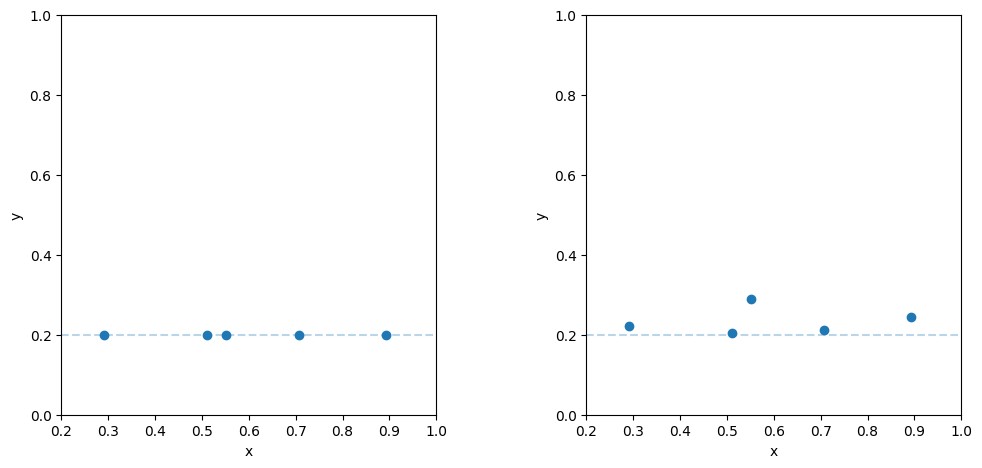

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
np.random.seed(3)
x = np.random.rand(5)
y1  = np.array([0.2]*5)
y2 = np.random.rand(5) * 0.1 + 0.2
for ax,y in zip([ax1,ax2],[y1,y2]):
    ax.scatter(x,y)
    ax.hlines(y=0.2,xmin=0.2,xmax=1, linestyle='--',alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(-0, 1)
    ax.set_xlim(0.2, 1)

plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

- Left: We always do not need all the features. The y component of all the points are the same, it provides NO additional information.
- Right: y values are restricted in a much smaller region than x values. This suggests that x component might provide more information. 

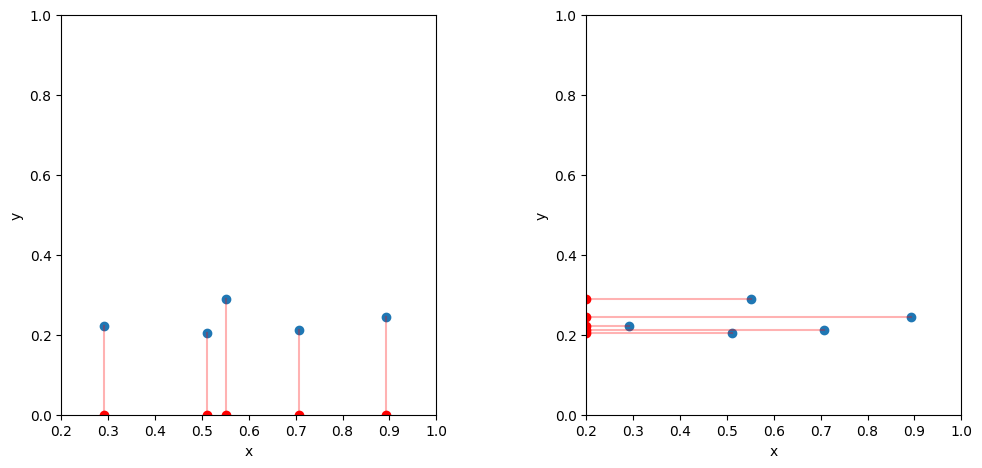

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

for i in range(len(x)):
    ax1.plot([x[i], x[i]], [y[i], 0], color='red', alpha=0.3)
ax1.scatter(x, y)
ax1.scatter(x, np.zeros(len(x)), color='red')
ax1.set_ylim(-0, 1)
ax1.set_xlim(0.2, 1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


for i in range(len(x)):
    ax2.plot([x[i], 0], [y[i], y[i]], color='red', alpha=0.3)
ax2.scatter(x, y)
ax2.scatter(np.ones(len(x)) * 0.2, y, color='red')
ax2.set_ylim(-0, 1)
ax2.set_xlim(0.2, 1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

- One way to compare is to project the observations to the two axes.
    - Left: For `x` axis, the projection spreads in a range around 0.3 to 0.9.
    - Right: In contrast, `y` is restricted in a much smaller region. This suggests that `x` component might provide more information, because all the `y` components are "about the same".

- Consider a set of 30 points in a three dimensional space. In such a scenario, we have: 20 observations and 3 features. 

In [62]:
def rotate(array):
    data = [
        [1, 0, 0],
        [0, np.sqrt(3) / 2, -np.sqrt(1) / 2],
        [0, np.sqrt(1) / 2, np.sqrt(3) / 2]]
    rot = np.matrix(data=data).T
    return np.array(np.matrix(array) * rot)

n = 30
np.random.seed(108)
z = 10. * np.random.rand(n) - 5
theta = 2 * np.pi * np.random.rand(n)
a = 5 - np.abs(z)
x = a / 2.5 * np.cos(theta)
y = a / 5. * np.sin(theta)
data = np.zeros((n, 3))
data[:, 0] = x
data[:, 1] = y
data[:, 2] = z
data = rotate(data)

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/4033736202.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


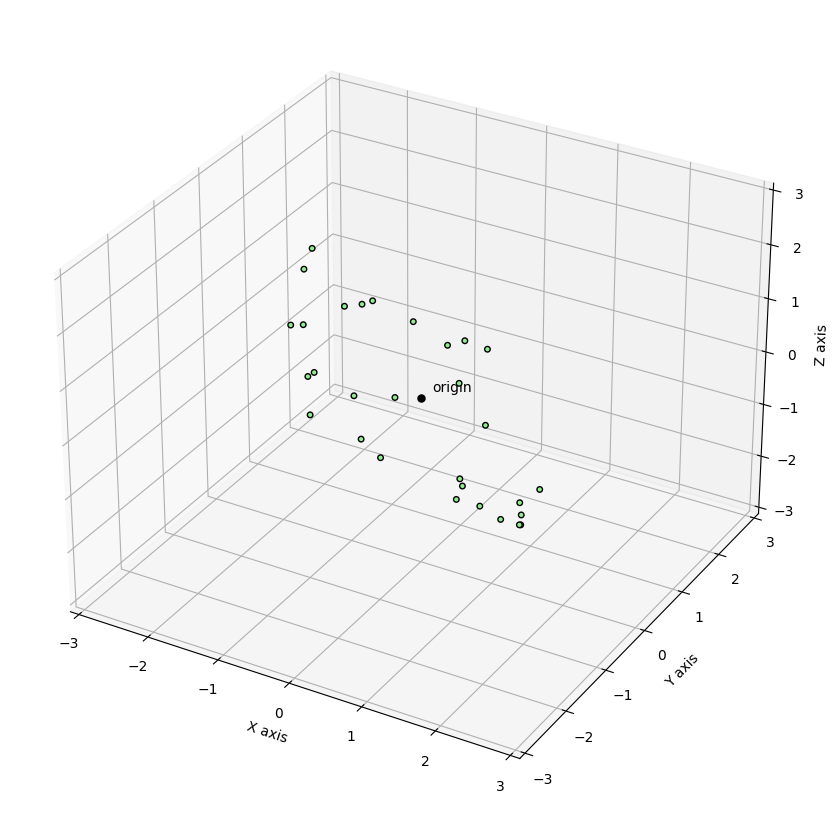

In [63]:
def plot_origin():
    ax.scatter(0, 0, 0, marker='o', s=26, color='black', alpha=1)
    
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_origin()

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.text(0+0.1,0+0.1,0+0.1,'origin')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

- We compare the importance of each direction. Note that the chosen directions in the example are not parallel to any coordinate axis. 

In [64]:
pca = PCA()
pca.fit(data)
first = pca.components_[[0]]
second= pca.components_[[1]]
third = pca.components_[[2]]
raw_data = data
data = data - pca.mean_

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/2718192245.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


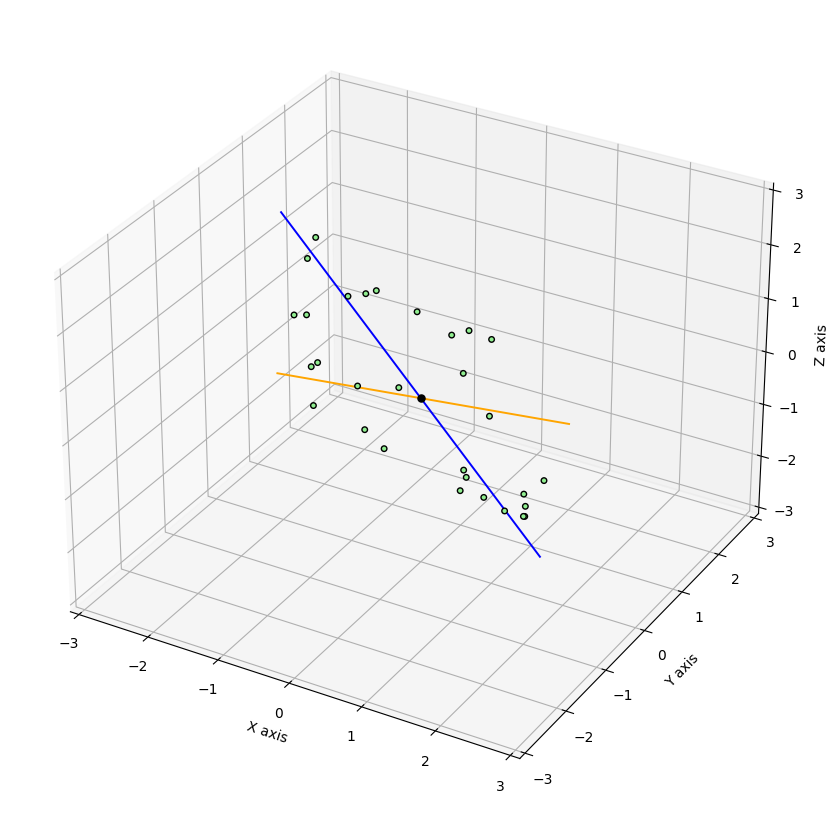

In [65]:
def plot_vec(array, length, color='blue', alpha=1):
    kwargs = dict(
        color=color,  # color of the curve
        linewidth=1.4,  # thickness of the line
        # linestyle='--',  # available styles - -- -. :
        alpha=alpha,
    )
    ax.plot(*zip(-array[0] * length, array[0] * length), **kwargs)

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_origin()
plot_vec(first, 6)

arbi = np.array([[ 0.99249426,  0.05066054,  0.1113043 ]])
plot_vec(arbi, 2, color='orange')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show() 

- We project each observation orthogonally to the “orange” direction. 

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/1854199813.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


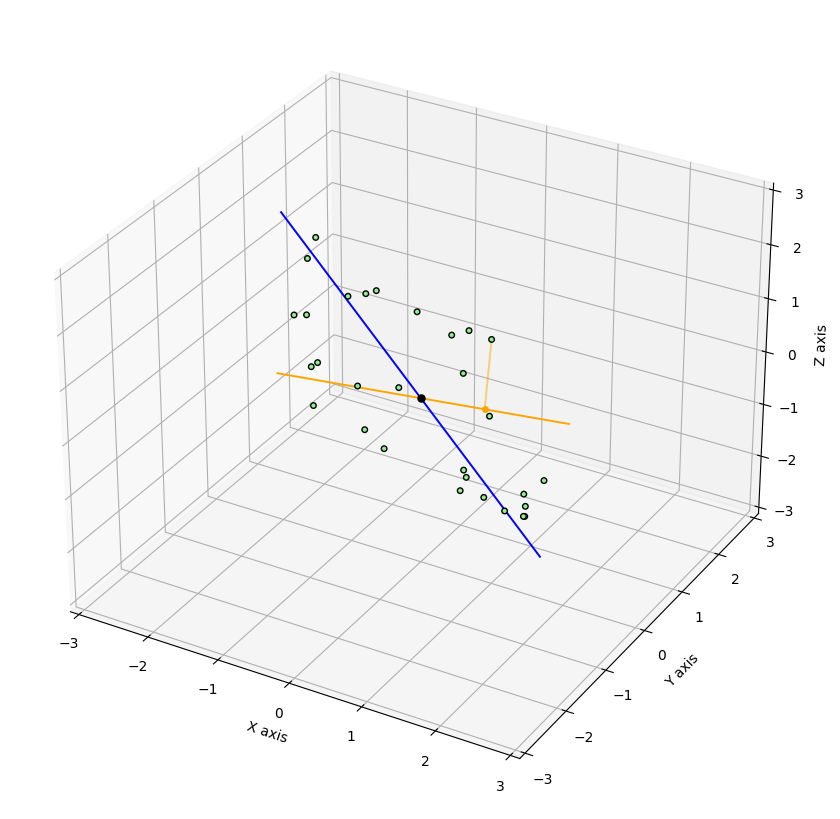

In [66]:
def project2vec(data, vec, id_=0, color='green', along=False):
    pp = data[[id_]]
    proj = (np.sum(vec*pp)*vec)
    ax.scatter( *( proj.ravel() ), color=color, s=16)
    kwargs = dict(
        color=color,  # colour of the curve
        linewidth=1.4,  # thickness of the line
        # linestyle='--',  # available styles - -- -. :
        alpha=0.5,
    )
    ax.plot(*(zip(pp[0], proj[0])), **kwargs)
    if along:
        along_kwargs = dict(
            color='Dark' + color,  # colour of the curve
            linewidth=1.4,  # thickness of the line
            # linestyle='--',  # available styles - -- -. :
            alpha=1,
        )
        ax.plot(*(zip(np.array([0,0,0]), proj[0])), **along_kwargs)
    return np.sum(vec*pp)

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_origin()
plot_vec(first, 6)


plot_vec(arbi, 2, color='orange')


len_proj = project2vec(data, arbi, id_=13, color='orange', along=False)


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/214528310.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


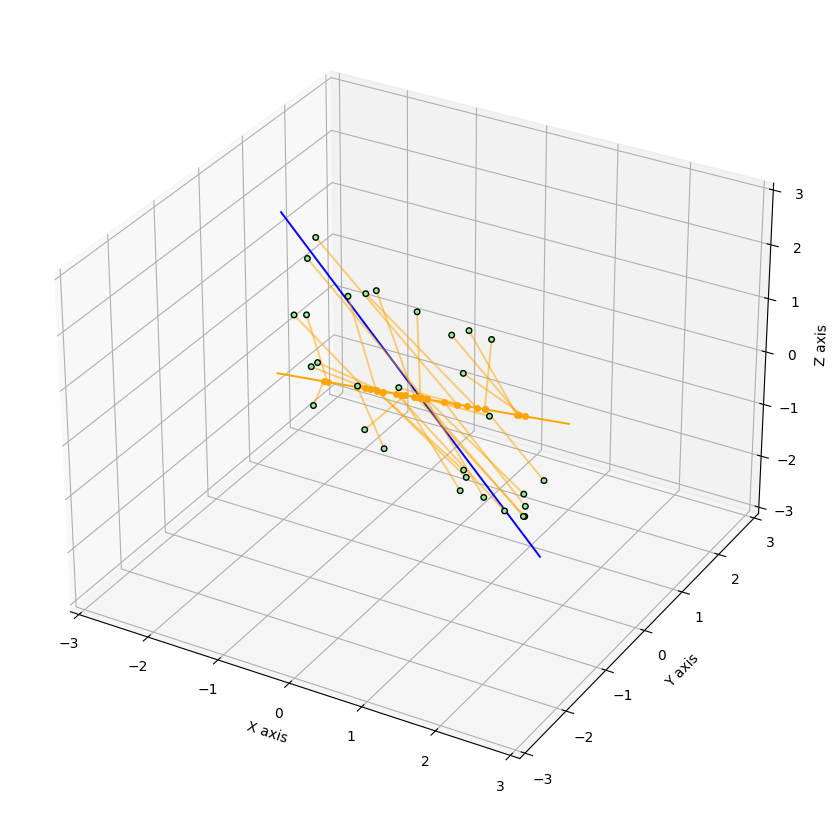

In [67]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_vec(first, 6)


plot_vec(arbi, 2, color='orange')

proj_arbi = []
for i in range(n):
    len_proj = project2vec(data, arbi, id_=i, color='orange', along=False)
    proj_arbi.append(len_proj)


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()


- We project each observation orthogonally to the “blue” direction. 

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/3649693078.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


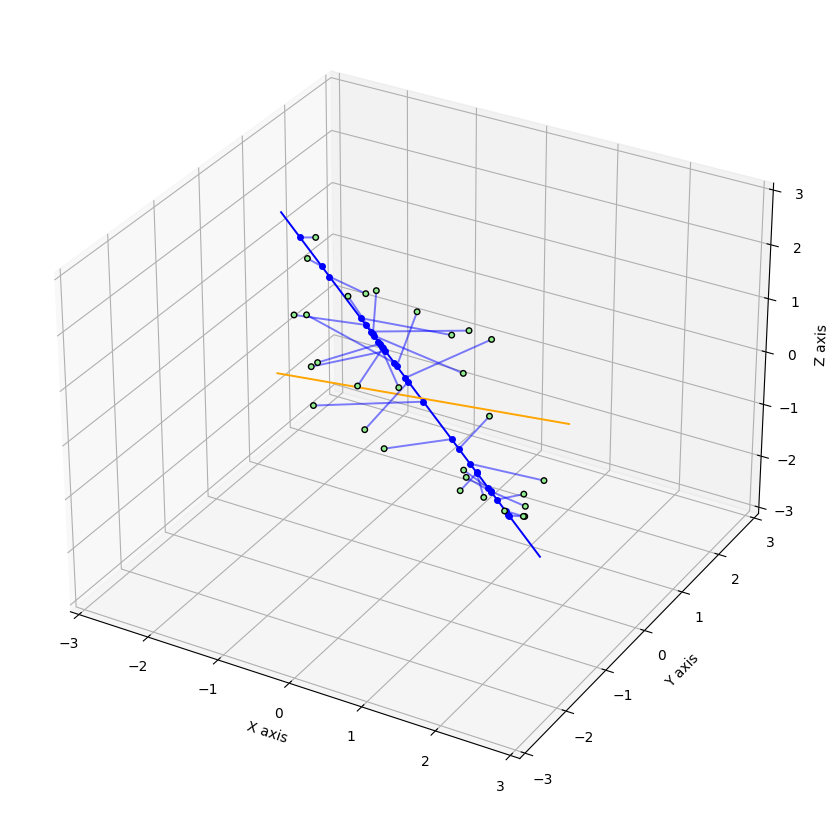

In [68]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_vec(first, 6)


plot_vec(arbi, 2, color='orange')

proj_first = []
for i in range(n):
    len_first = project2vec(data, first, id_=i, color='blue', along=False)
    proj_first.append(len_first)


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

The "blue" direction above is actually the **first principal component**, which means:

- it is the direction on which the projection of the observations is more widely spread than the projetion on any other direction.

- being a direction (vector), it has as many components as the number of the features usually.

Note that we characterized the first principal component direction, but we didn't show how it's found. We will discuss that but if you don't care about math, Python will find it for you.

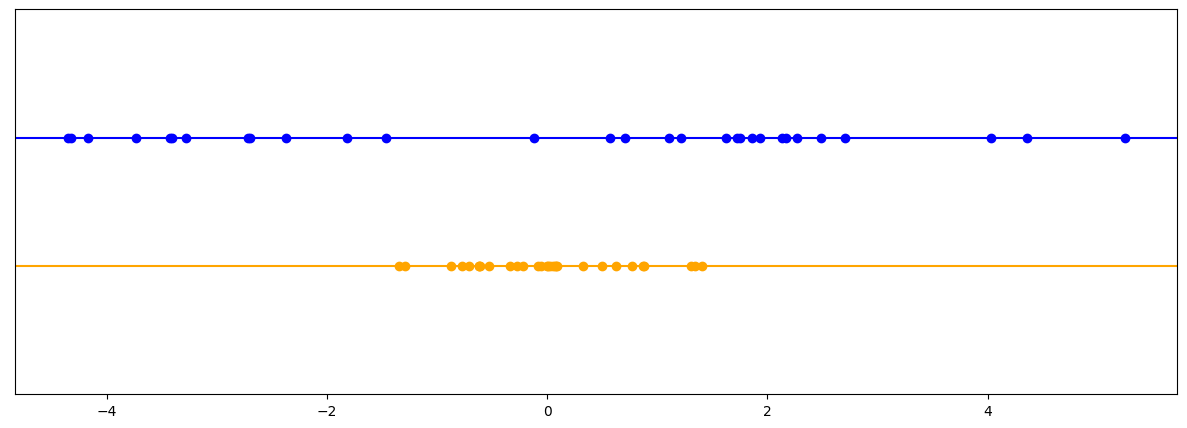

In [69]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(proj_first, np.ones(n) * 2, color='blue')
plt.axhline(y=2, color='blue')
plt.scatter(proj_arbi, np.ones(n), color='orange')
plt.axhline(y=1, color='orange')
plt.ylim(0, 3)
plt.yticks([])
plt.show()

- The statements above charaterizes the proncipal component direction. To find the principal component direction, we need to apply **linear algebra** which we will discuss later. However, if you don't care about math, Python will find it for you.

- With the first loading vector (heuristically the most important one), we want to keep, for all the observations, only the information recorded in this direction.
    - This is done by orthogonal linear projection.
    - There are in general N (the number of samples) components for principal component.
    - There are in general p (the number of features) components for a principal direction (the loading vector). 
    - The principal components live in the space of samples, while the principal directions live in the space of features. 


### 3.4.2. First Principal Component

- The first loading vector gives us a vector of length 30. This vector is the first principal component. 
- We need 30 records for all the observations.
- We do not use the xyz-coordinates – we use one coordinate, the first principal component. 
- The red projection can describe a certain length away from the origin along the principal direction and is a vector in the original xyz-coordinates. 

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/2677335760.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


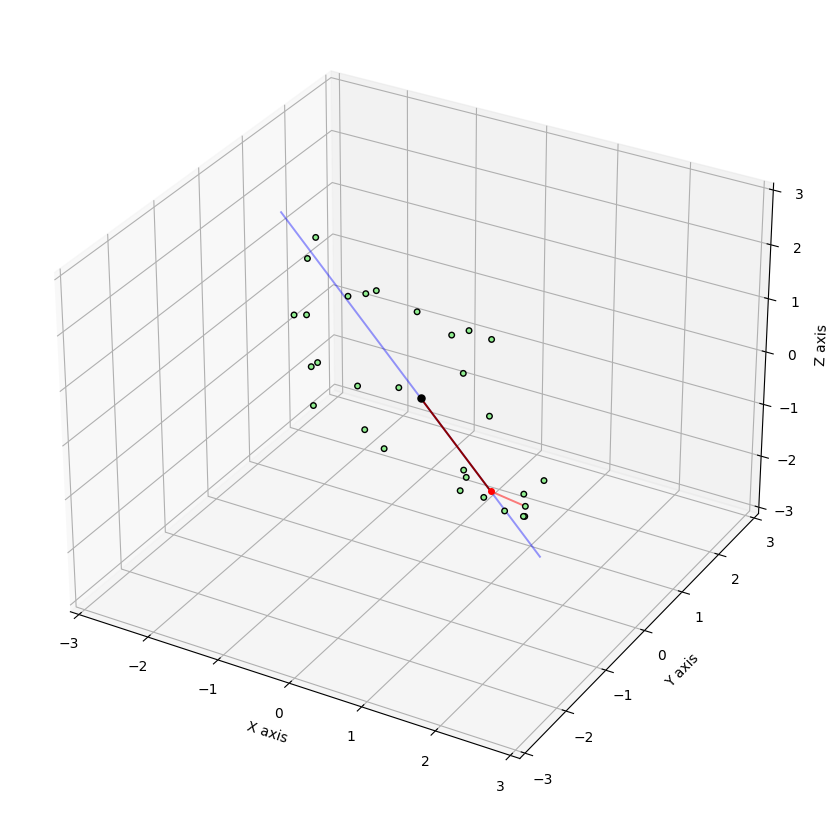

In [70]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_origin()
plot_vec(first, 6, alpha=0.4)

proj_len = project2vec(data, first, id_=3, color='red', along=True)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/2387682365.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


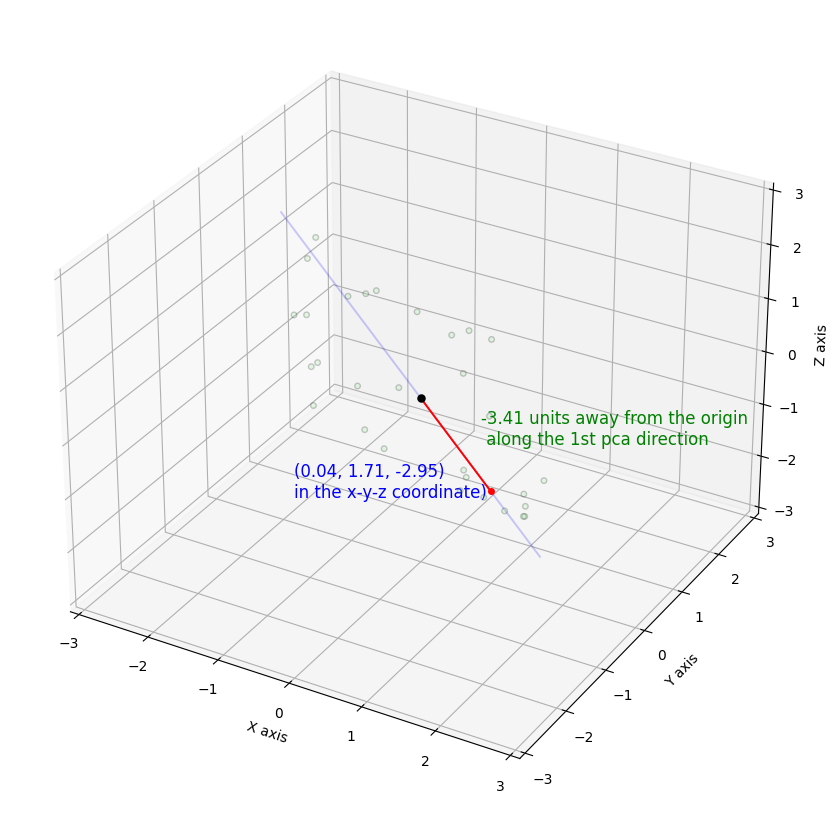

In [71]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=0.2)
plot_origin()
plot_vec(first, 6, alpha=0.2)
ax.scatter(*(proj_len*first[0]), marker='o', s=16, color='red', alpha=1)
ax.plot(*(zip(np.array([0,0,0]), proj_len*first[0])), 
        color='red', linewidth=1.4, alpha=1)

pca_fmt = '%.2f units away from the origin\n along the 1st pca direction'
pca_coord_txt = pca_fmt % proj_len 
ax.text(-0.01044 + 0.2, 1.164, -1.585, pca_coord_txt, color='green', size=12)

origin_fmt = '(%.2f, %.2f, %.2f)\nin the x-y-z coordinate)'
origin_coord_txt = origin_fmt %tuple((proj_len*first[0]))
ax.text(-0.01044 - 1.8, 0.964 - 1, -1.585 - 1, origin_coord_txt, color='blue', size=12)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

## 3.4.3. Second Principal Component
- The information stored is about the variation of the points across the whole sample set.
- Not all directions are born equal. 
- The first principal component provides the most information but most likely not all. 
- We remove the data information stored in the first principal component.
- Then find the new direction (orthogonal to the original principal direction) on which the projection of the observations is most widely spread. 
- We consider the 2-D plane that is perpendicular to the first loading vector. 


In [72]:
def plot_plane(normal, color='blue', alpha=0.2, x_min=-1.5, x_max=2.5, y_min=-2.5, y_max=1.5):
    x_min_rng = list(range(int(np.floor(x_min) + 1), 0))
    x_max_rng = list(range(int(np.floor(x_max))))
    y_min_rng = list(range(int(np.floor(y_min) + 1), 0))
    y_max_rng = list(range(int(np.floor(y_max))))
    surf_x, surf_y = np.meshgrid(
        [x_min] + x_min_rng + x_max_rng + [x_max],
        [y_min]+ y_min_rng + y_max_rng + [y_max])
    surf_z = (-normal[0, 0]*surf_x - normal[0, 1]*surf_y - 0.5)* 1. / normal[0, 2]
    ax.plot_surface(surf_x, surf_y, surf_z, color=color, alpha=0.1)
    
def project2plane(data, normal, id_=0, color='green', shoot=False):
    pp = data[[id_]]
    proj = pp - np.sum((pp * normal)) * normal
    ax.scatter(*proj.ravel(), color=color, s=16)
    if shoot:
        kwargs = dict(
            color=color,  # colour of the curve
            linewidth=1.4,  # thickness of the line
            # linestyle = '--',  # available styles - -- -. :
            alpha=0.5,
        )
        ax.plot(*(zip(pp[0], proj[0])), **kwargs)
    return pp - np.sum(normal * pp) * normal  

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/2825536652.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


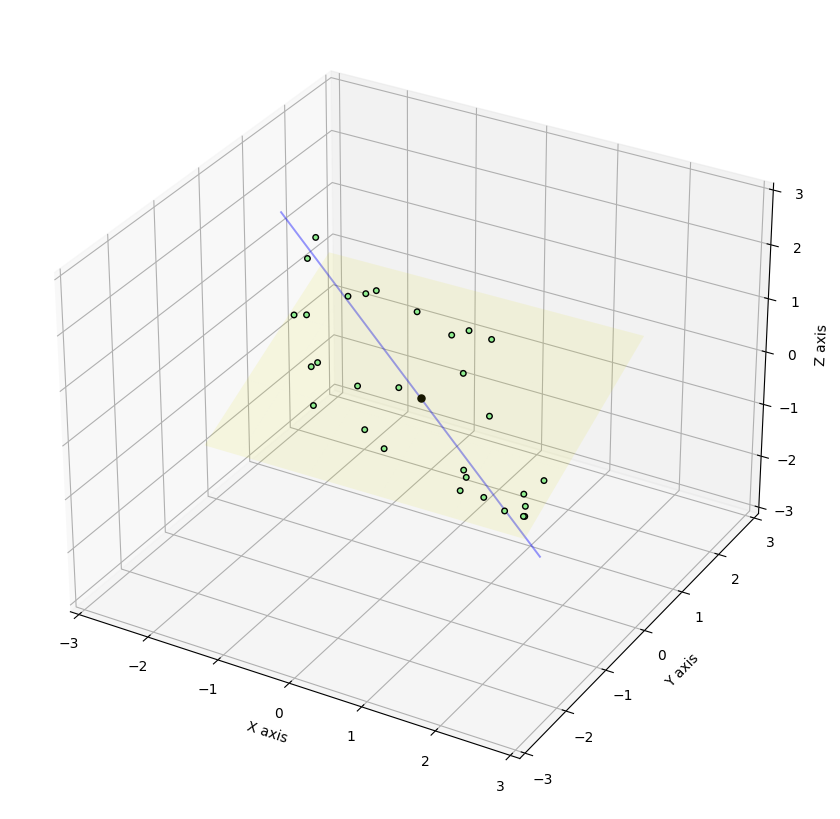

In [73]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_origin()
plot_vec(first, 6, alpha=0.4)
plot_plane(first, color='yellow', alpha=0.2, x_min=-2.5, x_max=2, y_min=-1, y_max=2)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/1662391894.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


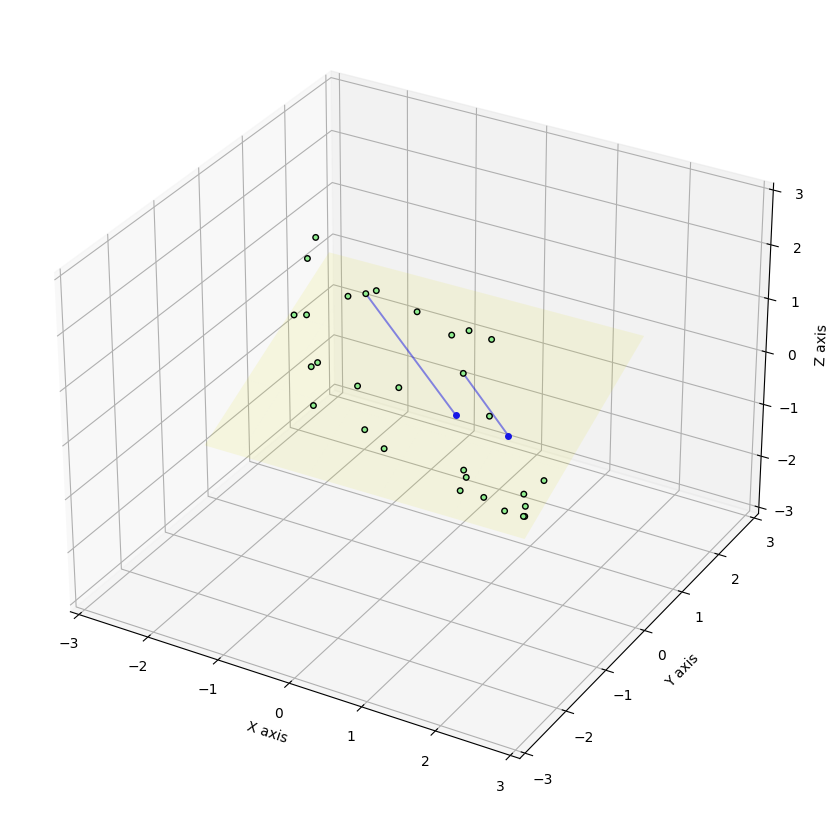

In [74]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_plane(first, color='yellow', alpha=0.2, x_min=-2.5, x_max=2, y_min=-1, y_max=2)

proj_on_plane=[]
for i in [5, 6]:
    aa= project2plane(data, first, id_=i, color='blue', shoot=True )
    proj_on_plane.append(aa)

    
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/331489838.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


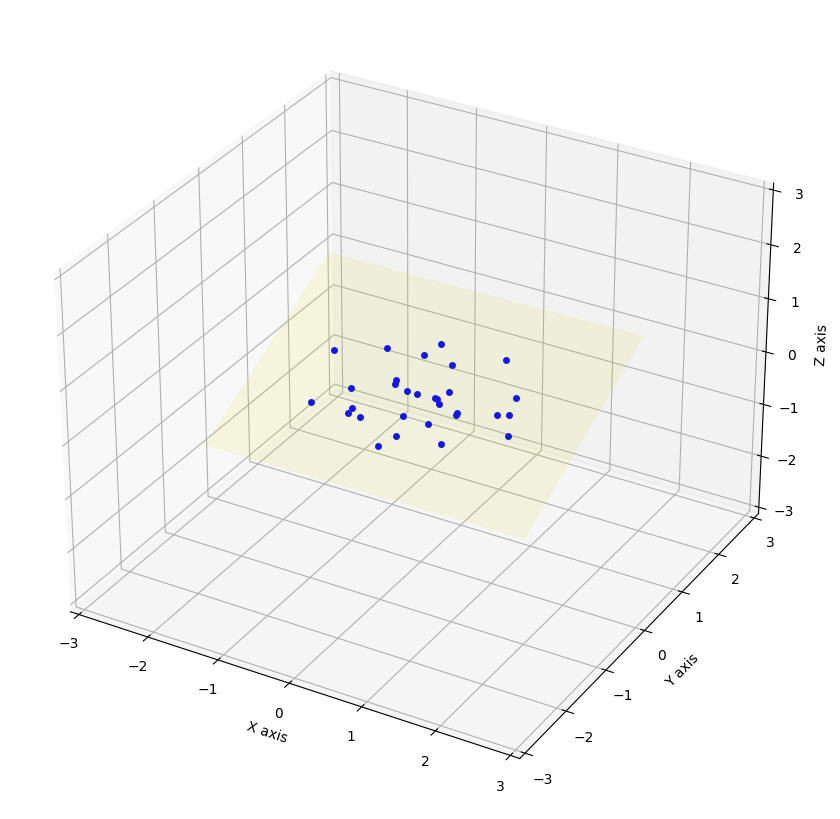

In [75]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
plot_plane(first, color='yellow', alpha=0.2, x_min=-2.5, x_max=2, y_min=-1, y_max=2)

for i in range(n):
    project2plane(data, first, id_=i, color='blue')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/3275599721.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


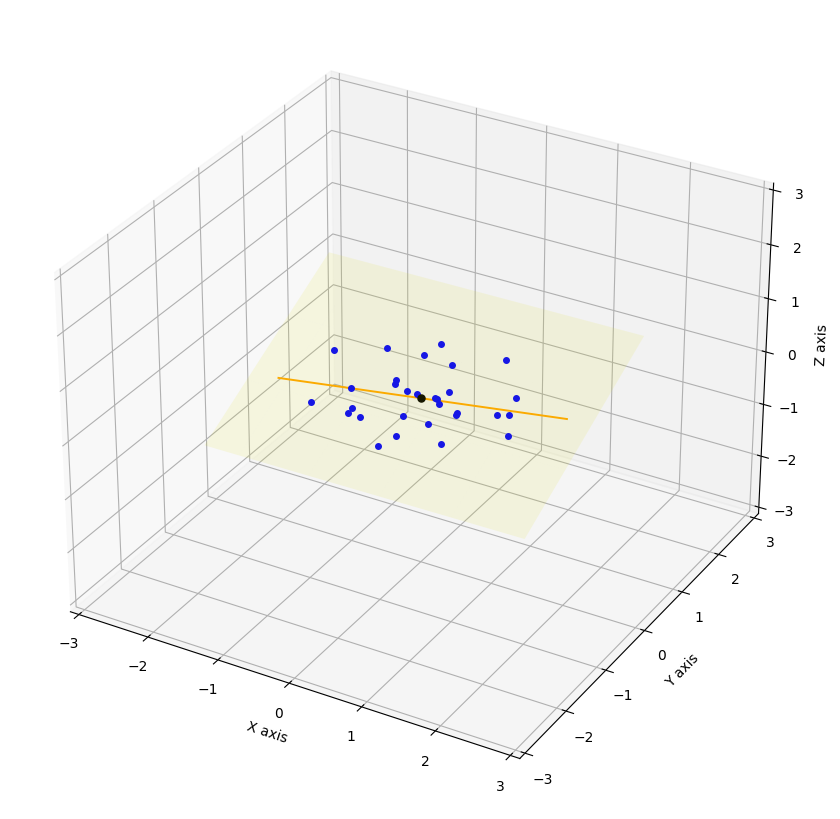

In [76]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

plot_origin()
plot_plane(first, color='yellow', alpha=0.2, x_min=-2.5, x_max=2, y_min=-1, y_max=2)
plot_vec(second, 1.9, alpha=1, color='orange')

for i in range(n):
    project2plane(data, first, id_=i, color='blue')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

- This process can be continued to retain more and more information from the raw data. However, we remove one dimension each time when we remove the information recorded in a principal direction. 
- We cannot have more number of the principal components than the number of the original features we have. 
- This induction process always terminates within a finite step. 


/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/2237829917.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


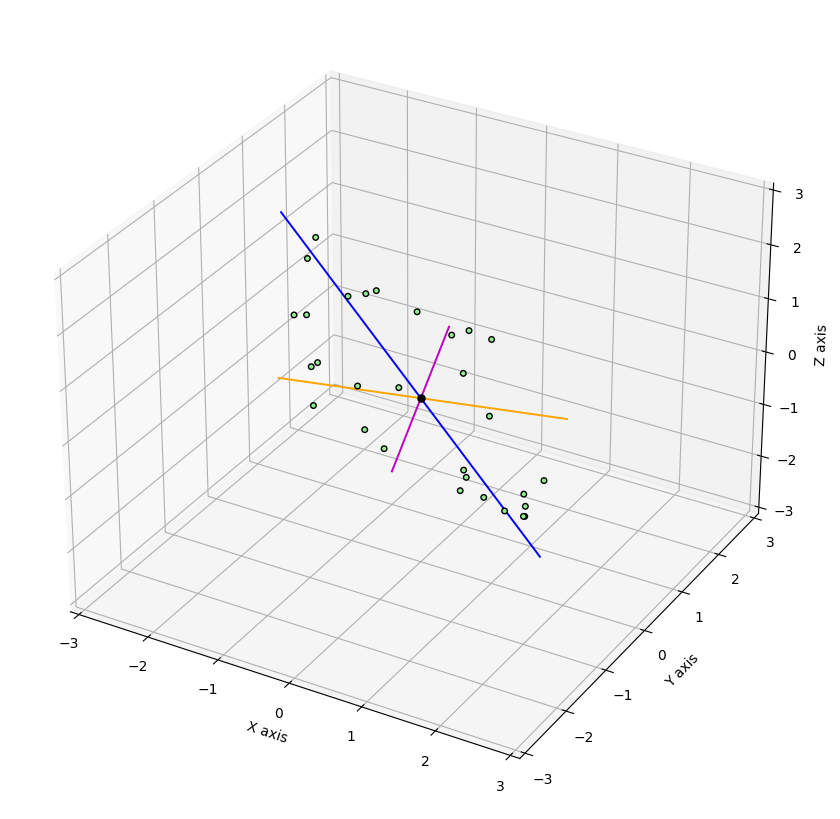

In [77]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

ax.scatter(*data.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
plot_origin()
plot_vec(first, 6, color='blue', alpha=1)
plot_vec(second, 1.9, color='orange', alpha=1)
plot_vec(third, 1.2, color='m', alpha=1)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.show()

## 3.4.4. The Mathematical Formulation

In this section we identify all the elements we saw in the visualization with the mathematical formula. It is a good transition between the visualization and the Python code. To be compatible with the notation in Python, vectors are row vectors below.

- The first (very important) step we need to do is to centralize the data. We may then assume our data $X$ is an `n` by `p` matrix (that means we have a data set of `n` observations and `p` features). The average of each column is 0.
- We then project the data into any possible direction. A direction is represented by a unit vector $\hat{u}$ in linear algebra, and the projection is $ X \hat{u}^{\text{T}} $

**Question** What is the dimension of $\hat{u}$ ? What is the dimensions of $X \hat{u}^{\text{T}}$ ? Why do these dimension make sense?

1. We need to find the direction on which the projection of the data **spread most widely**. In the mathematical formulation, it can be stated as:
$$
\text{maximize Var} ( X \hat{u}^{\text{T}} )\\
\text{subject to } \| \hat{u} \| = 1
$$
    - The solution to the optimization problem above is the **first principal component direction**, denoted by $ \phi_1 $. The projection of our data $X$ on the first principal component direction is $ Z_1 = X \phi_1^{\text{T}}$, which is called the **first principal component**.

2.  Once the first $k-1$ principal components are found, the next one (if there is one) can be found inductively.
    - We first remove the information about the first k-1 components from $X$ ($X_k$ denotes the resulted matrix). 
$$
X_k =  X - \sum_{i=1}^{k-1} X \phi_i \phi_i^{\text{T}}
$$
    - With this matrix we solve the optimization problem again:
$$
\text{maximize Var} ( X_k \hat{u}^{\text{T}} )\\
\text{subject to } \| \hat{u} \| = 1
$$
    - Again the solution $\phi_k$ is the **kth principal component direction** and the projection on this direction, $Z_k = X_k \hat{u}^{\text{T}}$, is called the **kth principal component**.
    - **Note** Solving an optimization problem can be hard. In the setting of PCA, this is relatively easy. The principal component directions are (essentially) the **eigenvectors** of the covariance matrix of the data, arranged in the descending order of the eigenvalues they correspond to.

## 3.4.5. PCA Properties
1. There are most `min(n, p)` principal components (but we often assume `p` of them).
2. The variances of each principal components decreases:
$$
\text{Var}(Z_1) ≥ \text{Var}(Z_2) ≥ ... ≥ \text{Var}(Z_p)
$$
3. The principal components $Z_1, Z_2, ..., Z_p$ are mutually uncorrelated.
4. The principal component directions
$
\phi_1, \phi_2, ..., \phi_p
$
are normalized and mutually perpendicular.

## 3.4.6. Geometrical Meaning
- Geometrically we can imagine that the original data set sits inside $\mathbb{R}^f$ as a high dimensional scatterplot. 
- The selection of the top p principal directions establishes a linear projection $\mathbb{R}^f\to\mathbb{R}^p$ into a lower dimensional space. 
- There are many orthogonal linear projections $\mathbb{R}^f\to\mathbb{R}^p$. But PCA is special that it collapses directions in which the variances are small and preserve those whose variances are larger. 
- Those directions which get collapsed are interpreted as noise of the data. 
- Even though the apparent dimension of the data is f dimensional, PCA hypothesizes that the true dimension of the data lies in a p dimensional linear space. 
- In this sense, PCA is a de-noising process revealing the true nature of the data. 
- Nonlinear projections into curved objects instead of linear spaces is called manifold learning as non-linear smooth objects are called manifolds in geometry.  



In [78]:
from sklearn.decomposition import PCA
pca = PCA()

**Arguments**: 

- **n_components**: Number of components to keep. In default it is `min(`n_samples, n_features`)`.

**Attributes**:

- **components_**: Components with maximum variance.
- **explained\_variance\_ratio\_**: Percentage of variance explained by each of the selected components. 
- **mean_**: The average of each feature.

**Methods:**

- **fit**: Fit the model with X.
- **fit_transform**: Fit the model with X and apply the dimensionality reduction on X.
- **inverse_transform**: Transform data back to its original space.
- **get_covariance**: Compute data covariance with the generative model.
- **get_params**: Get parameters for this estimator.
- **set_params**: Set the parameters of this estimator.
- **transform**: Apply the dimensionality reduction on X.

Here is a simple example. Let's use the data we visualize. For visualization, we have manually centralized the data. Here we use the data without being centralized, we will see that Python take care of this for us.

In [79]:
n = 30
np.random.seed(108)
z = 10. * np.random.rand(n) - 5
theta = 2 * np.pi * np.random.rand(n)
a = 5 - np.abs(z)
x = a / 2.5 * np.cos(theta)
y = a / 5. * np.sin(theta)
w = a / 1.25 * np.sin(theta)
v = a / 0.75 * np.cos(theta)
data = np.zeros((n, 5))
data[:, 0] = x
data[:, 1] = y
data[:, 2] = z
data[:, 3] = w
data[:, 4] = v

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/2917220527.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig)


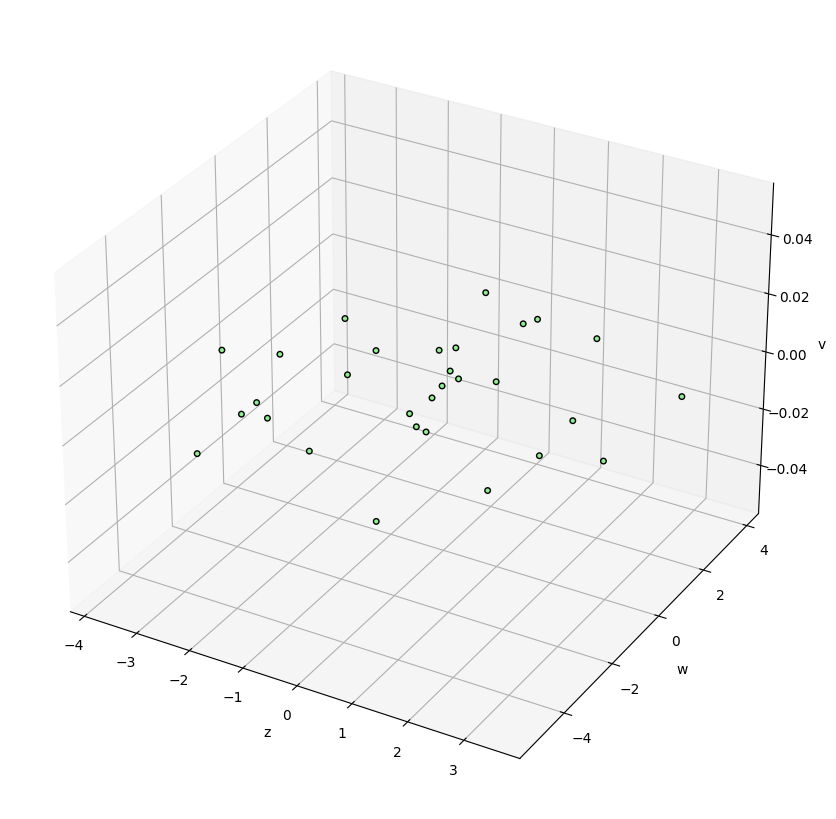

In [80]:
fig = plt.figure(figsize=(10, 8))
ax1 = Axes3D(fig)

ax1.scatter(*data[:,3:5].T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
ax1.set_xlabel('z')
ax1.set_ylabel('w')
ax1.set_zlabel('v')
plt.show()

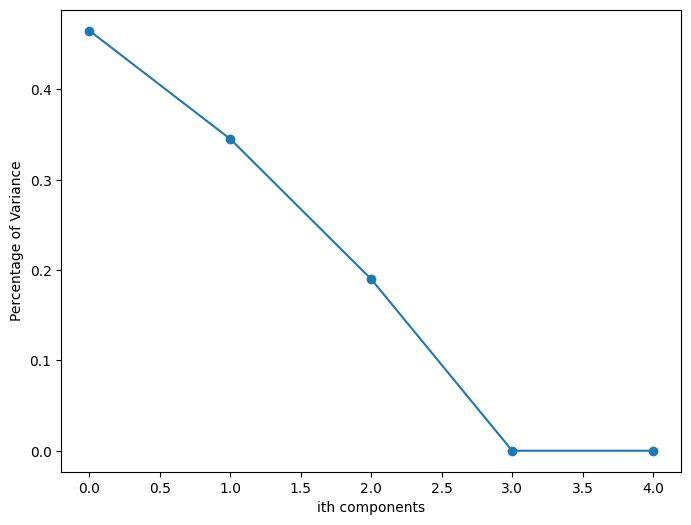

In [81]:
pca.set_params(n_components=None)
pca.fit(data)
plt.plot(range(5), pca.explained_variance_ratio_)
plt.scatter(range(5), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [82]:
pca.set_params(n_components=3).fit(data)
data2 = pca.transform(data)

In [83]:
pca.explained_variance_ratio_

array([0.46503734, 0.34505326, 0.1899094 ])

In [84]:
np.sum(pca.explained_variance_ratio_)

1.0

/var/folders/zs/85jcdr693vl6m_zcql7t8f0h0000gn/T/ipykernel_42983/1846819063.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


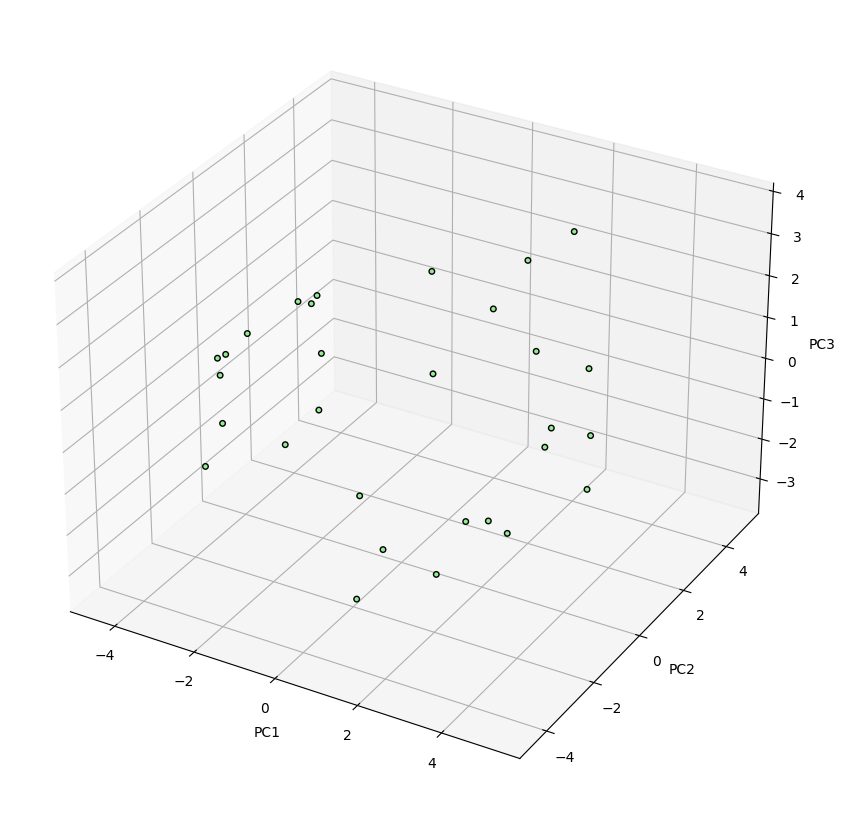

In [85]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)

ax.scatter(*data2.T, marker='o', s=16, c='Lightgreen', edgecolors='k', alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [86]:
pca.set_params(n_components=2).fit(data)
data3 = pca.transform(data)

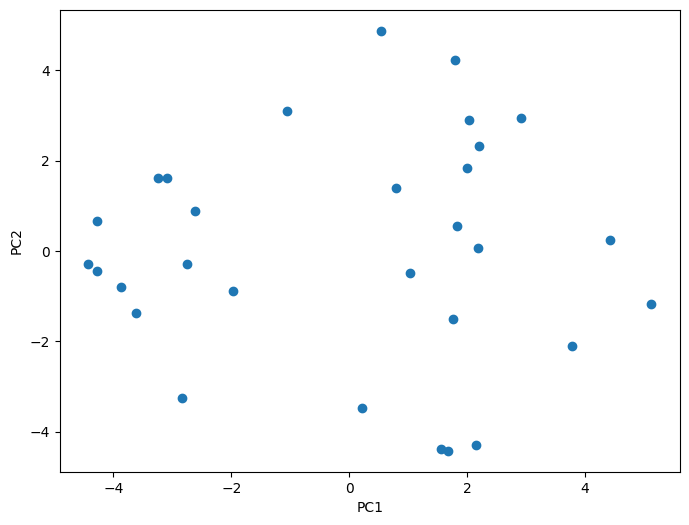

In [87]:
plt.scatter(data3[:,0],data3[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [88]:
pca.inverse_transform(data3) == data

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, Fal